# Load Libraries & Dataframe

In [194]:
# Manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Regression, Amputation, & Testing
from scipy import stats
from scipy.stats import skew
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, PolynomialFeatures, FunctionTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer

In [195]:
github_raw_csv_url = "https://raw.githubusercontent.com/NitoBoritto/Car_Sales_Regression_Analysis/master/car_resale_prices.csv"
Car_df = pd.read_csv(github_raw_csv_url)
Car_df

,Unnamed: 0,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city
0,0,2017 Maruti Baleno 1.2 Alpha,₹ 5.45 Lakh,2017,1197 cc,Third Party insurance,Manual,"40,000 Kms",First Owner,Petrol,83.1bhp,5.0,21.4 kmpl,Hatchback,Agra
1,1,2018 Tata Hexa XTA,₹ 10 Lakh,2018,2179 cc,Third Party insurance,Automatic,"70,000 Kms",First Owner,Diesel,153.86bhp,7.0,17.6 kmpl,MUV,Agra
2,2,2015 Maruti Swift Dzire VXI,₹ 4.50 Lakh,2015,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan,Agra
3,3,2015 Maruti Swift Dzire VXI,₹ 4.50 Lakh,2015,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan,Agra
4,4,2009 Hyundai i10 Magna 1.1,₹ 1.60 Lakh,2009,1086 cc,Third Party insurance,Manual,"80,000 Kms",First Owner,Petrol,68.05bhp,5.0,19.81 kmpl,Hatchback,Agra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17441,17441,2013 Honda Amaze VX i-Vtech,₹ 3.25 Lakh,Jul 2013,1198 cc,Comprehensive,Manual,"89,000 Kms",Second Owner,Petrol,86.7bhp,5.0,18 kmpl,Sedan,Delhi
17442,17442,2016 Toyota Camry 2.5 Hybrid,₹ 20.75 Lakh,Jun 2016,2494 cc,Comprehensive,Automatic,"68,000 Kms",First Owner,Petrol,157.7bhp,5.0,19.16 kmpl,Sedan,Delhi
17443,17443,2016 Toyota Corolla Altis GL MT,₹ 8.35 Lakh,Jun 2016,1798 cc,Comprehensive,Manual,"81,000 Kms",First Owner,Petrol,138.03bhp,5.0,14.28 kmpl,Sedan,Delhi
17444,17444,2019 Hyundai Creta 1.6 CRDi AT SX Plus,₹ 13.95 Lakh,Jun 2019,1582 cc,Comprehensive,Automatic,"20,000 Kms",First Owner,Diesel,126.2bhp,5.0,17.01 kmpl,SUV,Delhi


# EDA

#Initial Data Inspection

In [ ]:
Car_df.shape

(17446, 15)

In [ ]:
Car_df.head()

,Unnamed: 0,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city
0,0,2017 Maruti Baleno 1.2 Alpha,₹ 5.45 Lakh,2017,1197 cc,Third Party insurance,Manual,"40,000 Kms",First Owner,Petrol,83.1bhp,5.0,21.4 kmpl,Hatchback,Agra
1,1,2018 Tata Hexa XTA,₹ 10 Lakh,2018,2179 cc,Third Party insurance,Automatic,"70,000 Kms",First Owner,Diesel,153.86bhp,7.0,17.6 kmpl,MUV,Agra
2,2,2015 Maruti Swift Dzire VXI,₹ 4.50 Lakh,2015,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan,Agra
3,3,2015 Maruti Swift Dzire VXI,₹ 4.50 Lakh,2015,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan,Agra
4,4,2009 Hyundai i10 Magna 1.1,₹ 1.60 Lakh,2009,1086 cc,Third Party insurance,Manual,"80,000 Kms",First Owner,Petrol,68.05bhp,5.0,19.81 kmpl,Hatchback,Agra


In [ ]:
Car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17446 entries, 0 to 17445
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         17446 non-null  int64  
 1   full_name          17446 non-null  object 
 2   resale_price       17446 non-null  object 
 3   registered_year    17377 non-null  object 
 4   engine_capacity    17432 non-null  object 
 5   insurance          17439 non-null  object 
 6   transmission_type  17446 non-null  object 
 7   kms_driven         17443 non-null  object 
 8   owner_type         17401 non-null  object 
 9   fuel_type          17446 non-null  object 
 10  max_power          17344 non-null  object 
 11  seats              17436 non-null  float64
 12  mileage            16938 non-null  object 
 13  body_type          17446 non-null  object 
 14  city               17446 non-null  object 
dtypes: float64(1), int64(1), object(13)
memory usage: 2.0+ MB


In [ ]:
Car_df["full_name"].nunique()

6923

In [ ]:
Car_df["insurance"].unique()

array(['Third Party insurance', 'Comprehensive', 'Zero Dep',
       'Third Party', 'Not Available', nan, '2', '1'], dtype=object)

In [ ]:
Car_df["transmission_type"].unique()

array(['Manual', 'Automatic'], dtype=object)

In [ ]:
Car_df["owner_type"].unique()

array(['First Owner', 'Second Owner', 'Third Owner', 'Fifth Owner',
       'Fourth Owner', nan], dtype=object)

In [ ]:
Car_df["fuel_type"].unique()

array(['Petrol', 'Diesel', 'CNG', 'Electric', 'LPG'], dtype=object)

In [ ]:
Car_df["body_type"].unique()

array(['Hatchback', 'MUV', 'Sedan', 'Minivans', 'SUV', 'Toyota', 'Coupe',
       'Chevrolet', 'Mercedes-Benz', 'Audi', 'Maruti', 'Pickup',
       'Porsche', 'Tata', 'Mahindra', 'Volvo', 'Jaguar', 'BMW', 'Cars',
       'Datsun', 'Hyundai', 'Honda', 'Convertibles', 'Wagon', 'Skoda',
       'Isuzu'], dtype=object)

In [ ]:
Car_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,17446.0,8722.500000,5036.370734,0.0,4361.25,8722.5,13083.75,17445.0
seats,17436.0,5.205494,0.669321,2.0,5.00,5.0,5.00,14.0


In [ ]:
Car_df.head()

,Unnamed: 0,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city
0,0,2017 Maruti Baleno 1.2 Alpha,₹ 5.45 Lakh,2017,1197 cc,Third Party insurance,Manual,"40,000 Kms",First Owner,Petrol,83.1bhp,5.0,21.4 kmpl,Hatchback,Agra
1,1,2018 Tata Hexa XTA,₹ 10 Lakh,2018,2179 cc,Third Party insurance,Automatic,"70,000 Kms",First Owner,Diesel,153.86bhp,7.0,17.6 kmpl,MUV,Agra
2,2,2015 Maruti Swift Dzire VXI,₹ 4.50 Lakh,2015,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan,Agra
3,3,2015 Maruti Swift Dzire VXI,₹ 4.50 Lakh,2015,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan,Agra
4,4,2009 Hyundai i10 Magna 1.1,₹ 1.60 Lakh,2009,1086 cc,Third Party insurance,Manual,"80,000 Kms",First Owner,Petrol,68.05bhp,5.0,19.81 kmpl,Hatchback,Agra


In [ ]:
Car_df = Car_df.drop(columns="Unnamed: 0")

<Axes: >

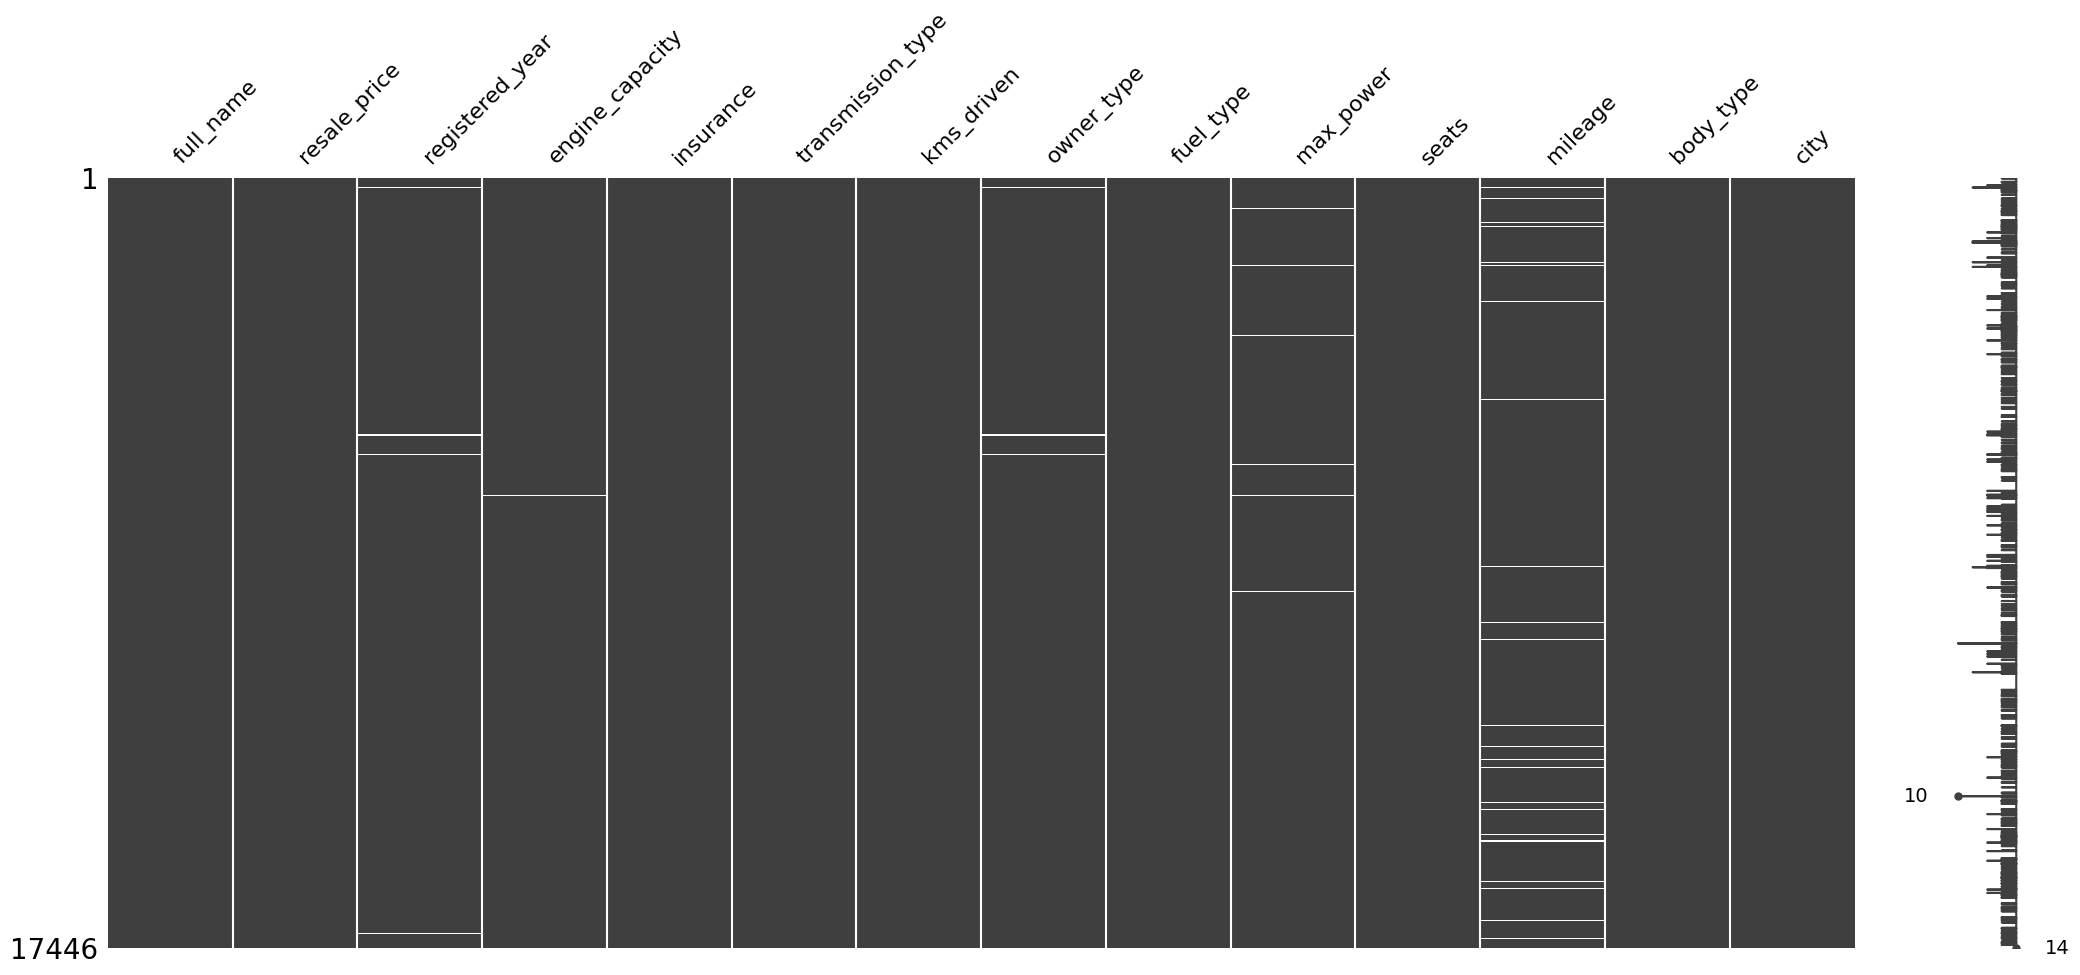

In [ ]:
import missingno as msno
msno.matrix(Car_df)

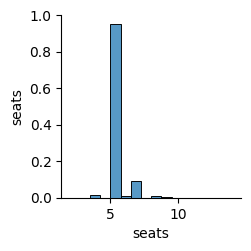

In [ ]:
sns.pairplot(Car_df)

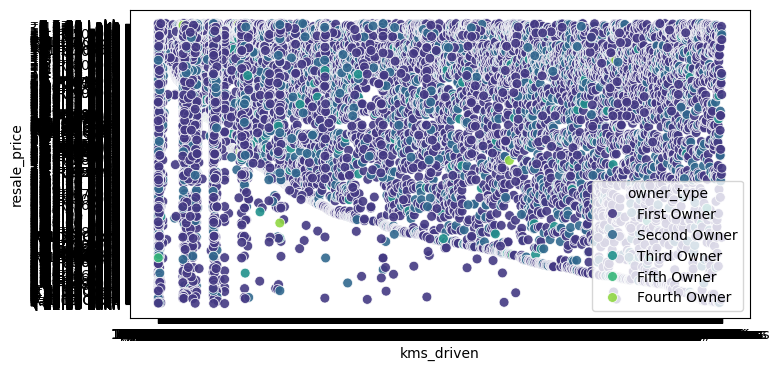

In [ ]:
plt.figure(figsize= (8,4))
sns.scatterplot(
    data = Car_df,
    x = "kms_driven",
    y = "resale_price",
    hue = "owner_type",
    palette="viridis",
    s = 50,
    alpha = 0.9
)

plt.show()

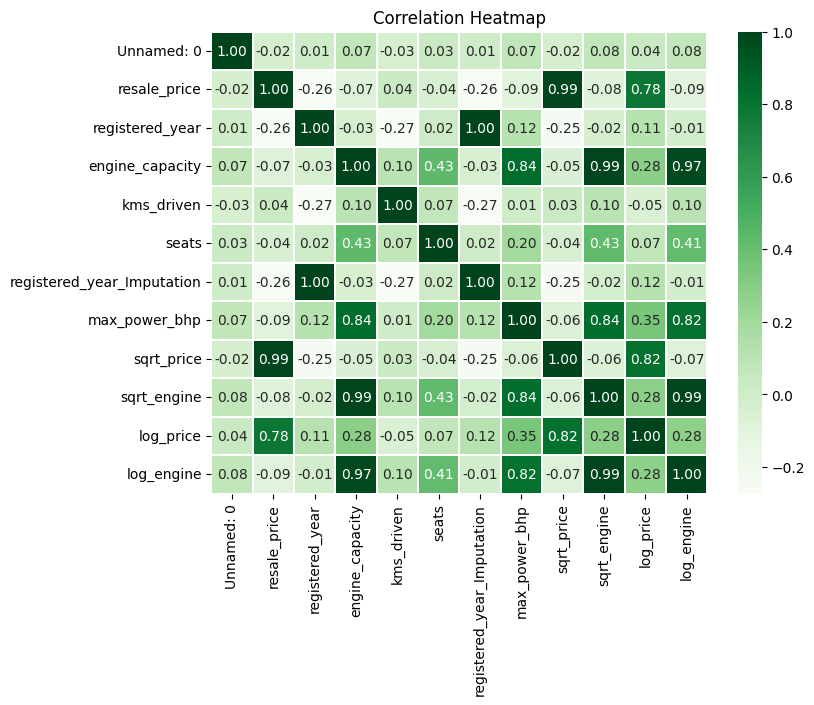

In [ ]:
numeric_cols = Car_df.select_dtypes(include=['float64','int64','int32'])
plt.figure(figsize=(8,6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='Greens', fmt=".2f", linewidths=0.2)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
Car_df

,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city
0,2017 Maruti Baleno 1.2 Alpha,₹ 5.45 Lakh,2017,1197 cc,Third Party insurance,Manual,"40,000 Kms",First Owner,Petrol,83.1bhp,5.0,21.4 kmpl,Hatchback,Agra
1,2018 Tata Hexa XTA,₹ 10 Lakh,2018,2179 cc,Third Party insurance,Automatic,"70,000 Kms",First Owner,Diesel,153.86bhp,7.0,17.6 kmpl,MUV,Agra
2,2015 Maruti Swift Dzire VXI,₹ 4.50 Lakh,2015,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan,Agra
3,2015 Maruti Swift Dzire VXI,₹ 4.50 Lakh,2015,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan,Agra
4,2009 Hyundai i10 Magna 1.1,₹ 1.60 Lakh,2009,1086 cc,Third Party insurance,Manual,"80,000 Kms",First Owner,Petrol,68.05bhp,5.0,19.81 kmpl,Hatchback,Agra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17441,2013 Honda Amaze VX i-Vtech,₹ 3.25 Lakh,Jul 2013,1198 cc,Comprehensive,Manual,"89,000 Kms",Second Owner,Petrol,86.7bhp,5.0,18 kmpl,Sedan,Delhi
17442,2016 Toyota Camry 2.5 Hybrid,₹ 20.75 Lakh,Jun 2016,2494 cc,Comprehensive,Automatic,"68,000 Kms",First Owner,Petrol,157.7bhp,5.0,19.16 kmpl,Sedan,Delhi
17443,2016 Toyota Corolla Altis GL MT,₹ 8.35 Lakh,Jun 2016,1798 cc,Comprehensive,Manual,"81,000 Kms",First Owner,Petrol,138.03bhp,5.0,14.28 kmpl,Sedan,Delhi
17444,2019 Hyundai Creta 1.6 CRDi AT SX Plus,₹ 13.95 Lakh,Jun 2019,1582 cc,Comprehensive,Automatic,"20,000 Kms",First Owner,Diesel,126.2bhp,5.0,17.01 kmpl,SUV,Delhi


#Numerical Features Analysis

Kms Driven vs Resale Price

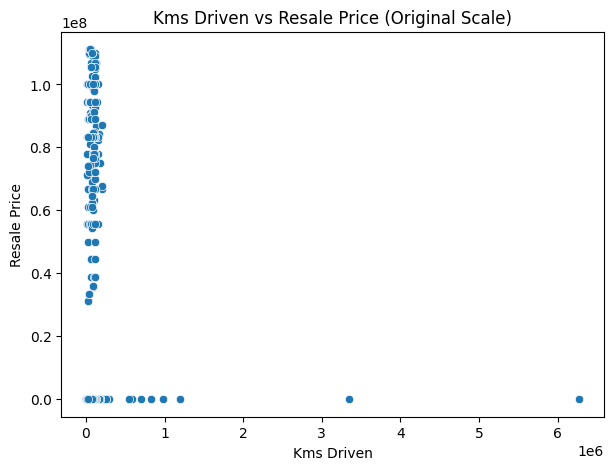

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='kms_driven', y='resale_price', data=Car_df)

plt.title('Kms Driven vs Resale Price (Original Scale)')
plt.xlabel('Kms Driven')
plt.ylabel('Resale Price')
plt.show()


Engine Capacity vs Resale Price

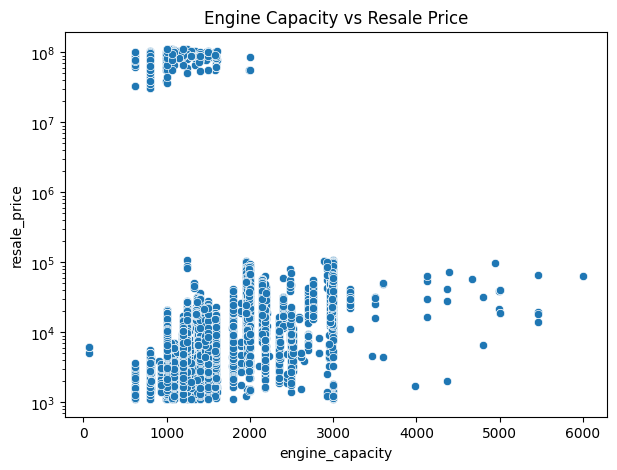

In [ ]:

plt.figure(figsize=(7,5))
sns.scatterplot(x='engine_capacity', y='resale_price', data=Car_df)
plt.yscale('log')
plt.title('Engine Capacity vs Resale Price')
plt.show()

#Categorical Feature Analysis

Fuel Type vs Resale Price

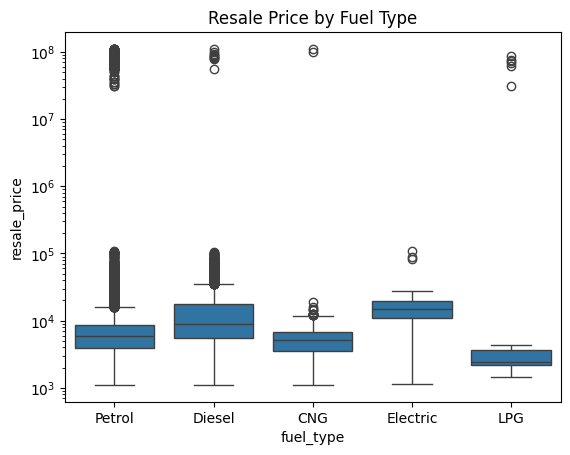

In [ ]:
sns.boxplot(x='fuel_type', y='resale_price', data=Car_df)
plt.yscale('log')
plt.title('Resale Price by Fuel Type')
plt.show()

Transmission vs Resale Price

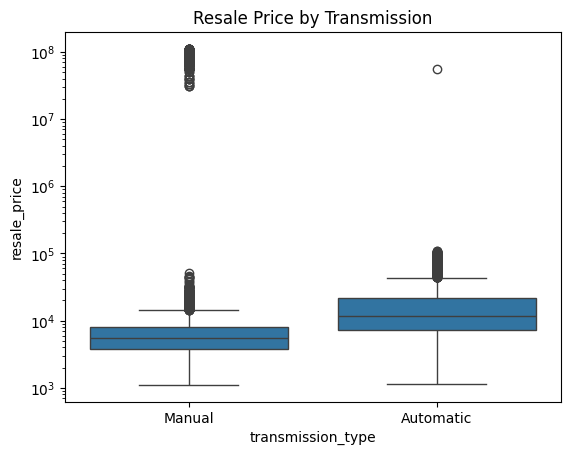

In [ ]:
sns.boxplot(x='transmission_type', y='resale_price', data=Car_df)
plt.yscale('log')
plt.title('Resale Price by Transmission')
plt.show()

Owner Type vs Resale Price

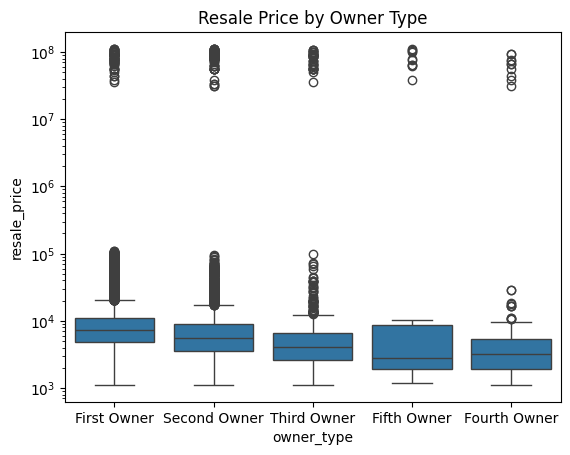

In [ ]:
sns.boxplot(x='owner_type', y='resale_price', data=Car_df)
plt.yscale('log')
plt.title('Resale Price by Owner Type')
plt.show()

#Correlation Analysis

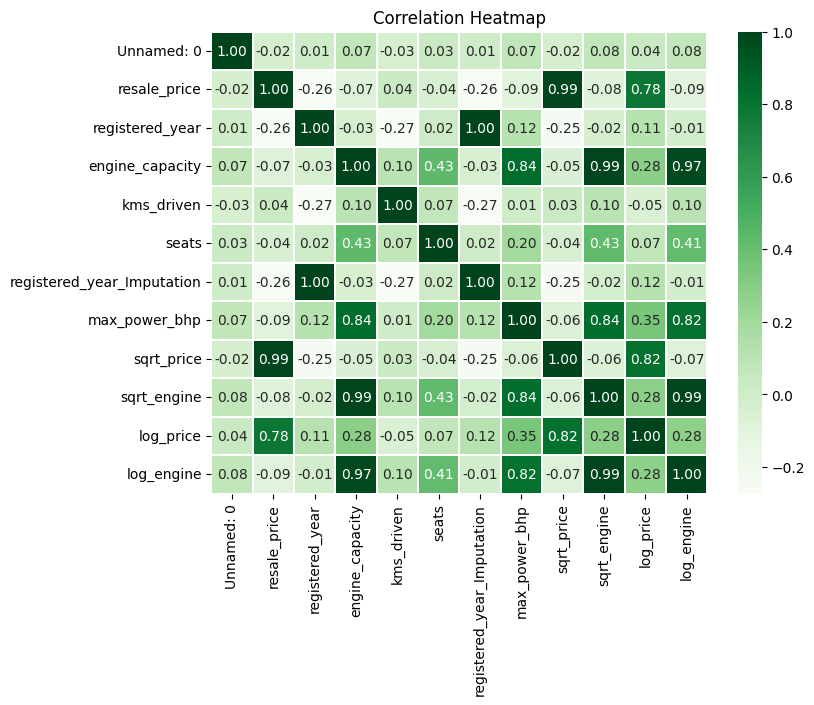

In [ ]:
numeric_cols = Car_df.select_dtypes(include=['float64','int64','int32'])
plt.figure(figsize=(8,6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='Greens', fmt=".2f", linewidths=0.2)
plt.title("Correlation Heatmap")
plt.show()

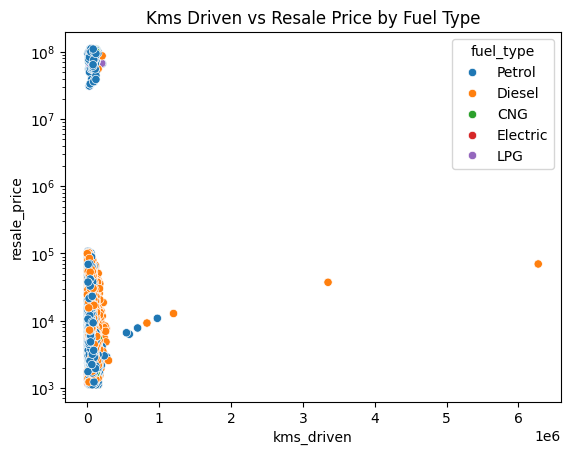

In [ ]:
sns.scatterplot(x='kms_driven', y='resale_price', hue='fuel_type', data=Car_df)
plt.yscale('log')
plt.title('Kms Driven vs Resale Price by Fuel Type')
plt.show()

#resale_price_column

 we make a histogram to see the the distribution of the price , we relaize that there is right skewness

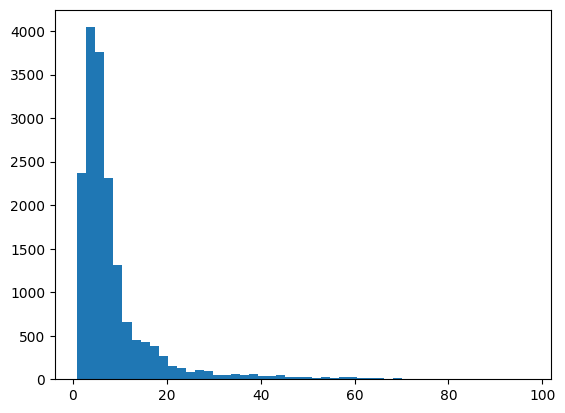

In [ ]:

plt.hist(Car_df['resale_price'], bins=50)
plt.show()


 we make summary statistices for resale_price distribution and see that the mean(9.54) > median(6.615)  which indicates that there is right skew ->meaning there are a small number of very expensive cars pulling the average up
The difference between the Q3 (9.055) and the maximum value (97.0) is very large. This confirms the likelihood of high-value outliers

In [ ]:
Car_df['resale_price'].describe()

,resale_price
count,17446
unique,1738
top,₹ 4.50 Lakh
freq,216


<Axes: xlabel='resale_price'>

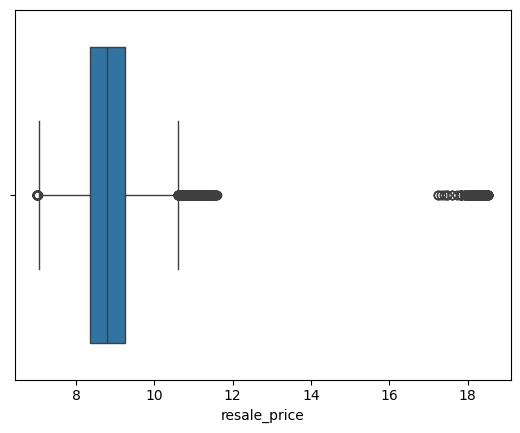

In [ ]:
sns.boxplot(x=np.log1p(Car_df['resale_price']))

(0.0, 33350.74)

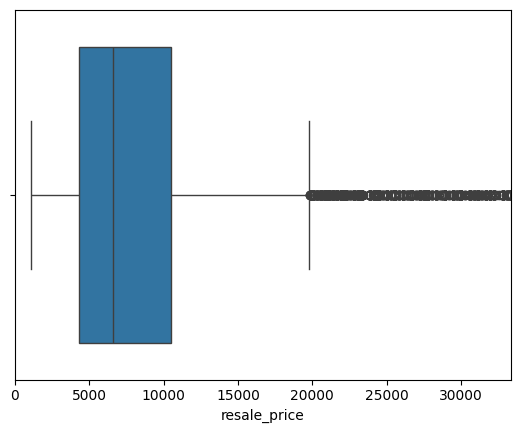

In [ ]:
sns.boxplot(x=Car_df['resale_price'])
plt.xlim(0, Car_df['resale_price'].quantile(0.95))

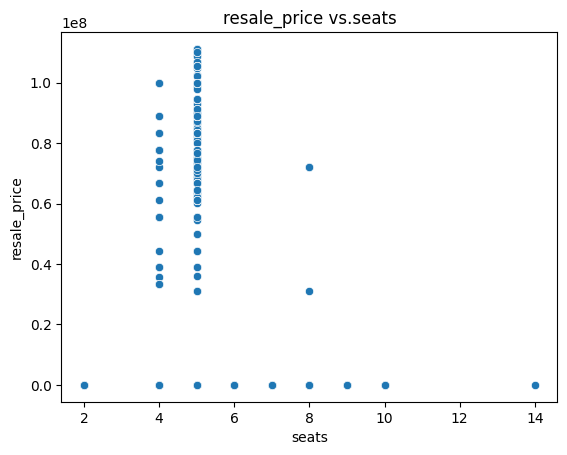

In [ ]:
sns.scatterplot(x='seats', y='resale_price', data=Car_df)

plt.title('resale_price vs.seats')
plt.xlabel('seats')
plt.ylabel('resale_price')
plt.show()

# The distribution of engine_capacity is highly skewed to the right (positive skew).
# The vast majority of cars in the dataset have an engine capacity between 1000 cc and 3000 cc.
# The bins between 3000 cc and 6000 cc are almost entirely empty or contain a very small number of cars. This suggests that cars with very large engine capacities  are rare outliers in this dataset.

# Engine_capacity_column

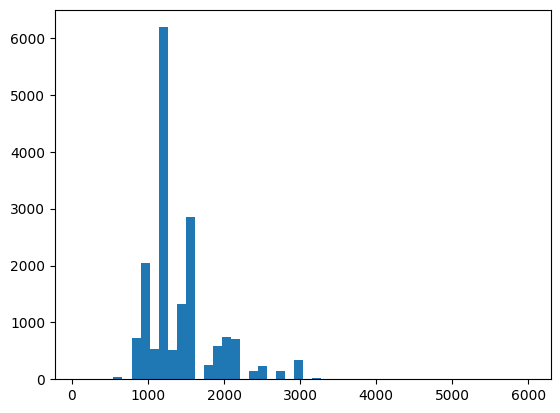

In [ ]:
plt.hist(Car_df['engine_capacity'], bins=50)
plt.show()

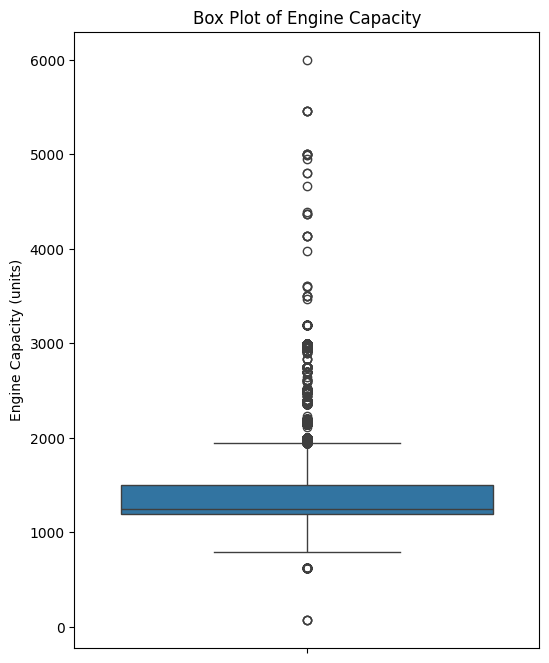

In [ ]:
plt.figure(figsize=(6, 8))

sns.boxplot(y=Car_df['engine_capacity'])

plt.title('Box Plot of Engine Capacity')
plt.ylabel('Engine Capacity (units)')
plt.show()

we see that there is right skewnewes in the graph so that column is not uniformy distributed and that column as multimodal and boxplot show us that there is outliers

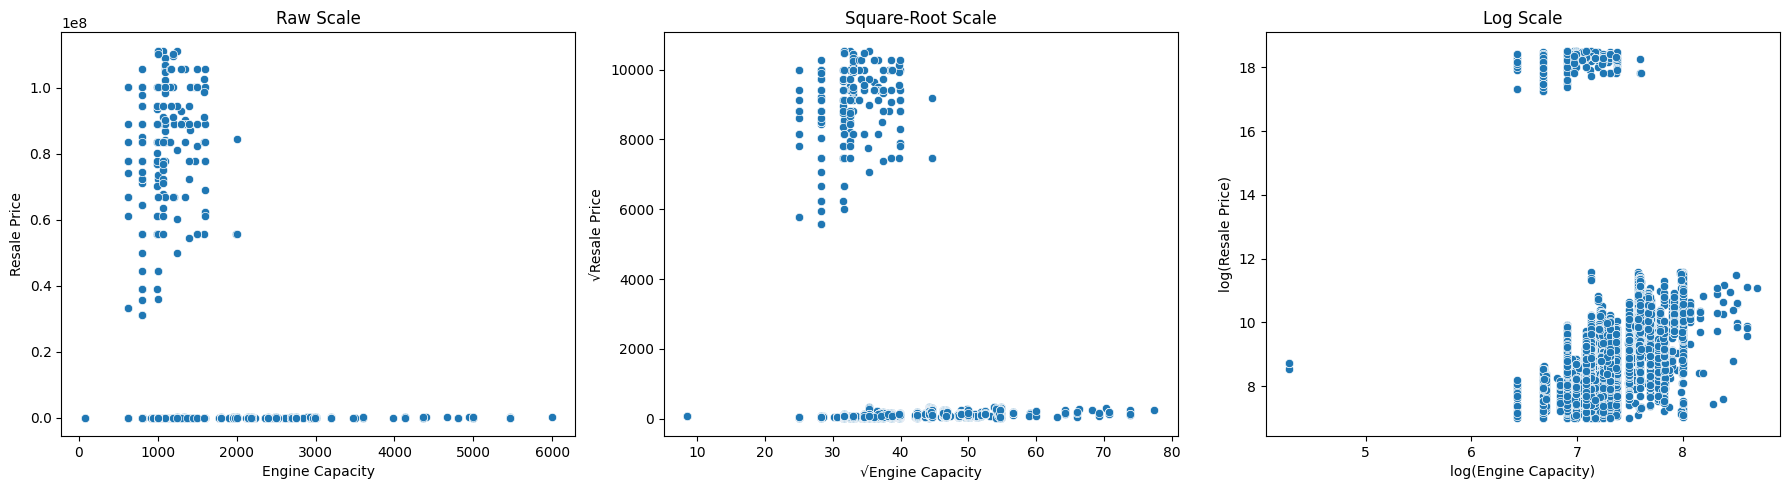

In [ ]:
# Create transformed columns
Car_df['sqrt_price'] = np.sqrt(Car_df['resale_price'])
Car_df['sqrt_engine'] = np.sqrt(Car_df['engine_capacity'])

Car_df['log_price']  = np.log(Car_df['resale_price'])
Car_df['log_engine'] = np.log(Car_df['engine_capacity'])

plt.figure(figsize=(18, 5))

# --- Raw scale ---
plt.subplot(1, 3, 1)
sns.scatterplot(x='engine_capacity', y='resale_price', data=Car_df)
plt.title("Raw Scale")
plt.xlabel("Engine Capacity")
plt.ylabel("Resale Price")

# --- Square-root scale ---
plt.subplot(1, 3, 2)
sns.scatterplot(x='sqrt_engine', y='sqrt_price', data=Car_df)
plt.title("Square-Root Scale")
plt.xlabel("√Engine Capacity")
plt.ylabel("√Resale Price")

# --- Log scale ---
plt.subplot(1, 3, 3)
sns.scatterplot(x='log_engine', y='log_price', data=Car_df)
plt.title("Log Scale")
plt.xlabel("log(Engine Capacity)")
plt.ylabel("log(Resale Price)")

plt.tight_layout()
plt.show()

after we take the square root for the column we see that the linreaty is improved but when we take the log it improved more and more so its the best choice

In [ ]:
Car_df["mileage"] = Car_df["mileage"].fillna(Car_df["mileage"].mean())
Car_df["resale_price"] = Car_df["resale_price"].fillna(Car_df["resale_price"].mean())

TypeError: can only concatenate str (not "int") to str

In [ ]:
np.corrcoef(Car_df["resale_price"], Car_df["mileage"])

TypeError: can only concatenate str (not "float") to str

#mileage_column

TypeError: 'value' must be an instance of str or bytes, not a float

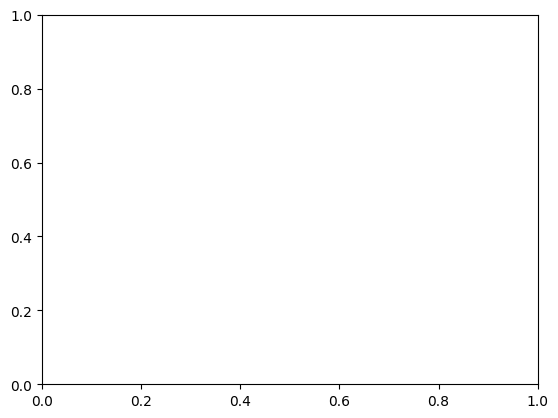

In [ ]:
plt.hist(Car_df['mileage'], bins=30)
plt.title('Mileage Distribution ')
plt.show()

In [ ]:
plt.hist(np.log(Car_df['mileage']), bins=30)
plt.title('Log-Transformed Mileage Distribution')
plt.xlabel('log(Mileage)')
plt.ylabel('Count')
plt.show()

TypeError: loop of ufunc does not support argument 0 of type str which has no callable log method

In [ ]:
plt.hist(np.sqrt(Car_df['mileage']), bins=30)
plt.title('square_root Transformed Mileage Distribution')
plt.xlabel('sqrt(Mileage)')
plt.ylabel('Count')
plt.show()

In [ ]:
plt.figure(figsize=(15, 5)) # A wide figure is best for a 1x3 layout

# --- PLOT 1: Original Distribution ---
plt.subplot(1, 3, 1) # 1 row, 3 columns, position 1
plt.hist(Car_df['mileage'], bins=30)
plt.title('Original Mileage Distribution')
plt.xlabel('Mileage')
plt.ylabel('Count')

# --- PLOT 2: Log-Transformed Distribution ---
plt.subplot(1, 3, 2) # 1 row, 3 columns, position 2
plt.hist(np.log(Car_df['mileage']), bins=30)
plt.title('Log-Transformed Mileage Distribution')
plt.xlabel('log(Mileage)')
plt.ylabel('Count')

# --- PLOT 3: Square Root-Transformed Distribution ---
plt.subplot(1, 3, 3) # 1 row, 3 columns, position 3
plt.hist(np.sqrt(Car_df['mileage']), bins=30)
plt.title('Square Root Transformed Mileage Distribution')
plt.xlabel('sqrt(Mileage)')
plt.ylabel('Count')

# Adjust subplots so they don't overlap
plt.tight_layout()

# Display the entire figure containing all three plots
plt.show()

the grapgh become approximitly uniform distribution after taking the log

# Preprocessing

In [196]:
Car_df = Car_df.drop(columns="Unnamed: 0")
Car_df

,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city
0,2017 Maruti Baleno 1.2 Alpha,₹ 5.45 Lakh,2017,1197 cc,Third Party insurance,Manual,"40,000 Kms",First Owner,Petrol,83.1bhp,5.0,21.4 kmpl,Hatchback,Agra
1,2018 Tata Hexa XTA,₹ 10 Lakh,2018,2179 cc,Third Party insurance,Automatic,"70,000 Kms",First Owner,Diesel,153.86bhp,7.0,17.6 kmpl,MUV,Agra
2,2015 Maruti Swift Dzire VXI,₹ 4.50 Lakh,2015,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan,Agra
3,2015 Maruti Swift Dzire VXI,₹ 4.50 Lakh,2015,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan,Agra
4,2009 Hyundai i10 Magna 1.1,₹ 1.60 Lakh,2009,1086 cc,Third Party insurance,Manual,"80,000 Kms",First Owner,Petrol,68.05bhp,5.0,19.81 kmpl,Hatchback,Agra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17441,2013 Honda Amaze VX i-Vtech,₹ 3.25 Lakh,Jul 2013,1198 cc,Comprehensive,Manual,"89,000 Kms",Second Owner,Petrol,86.7bhp,5.0,18 kmpl,Sedan,Delhi
17442,2016 Toyota Camry 2.5 Hybrid,₹ 20.75 Lakh,Jun 2016,2494 cc,Comprehensive,Automatic,"68,000 Kms",First Owner,Petrol,157.7bhp,5.0,19.16 kmpl,Sedan,Delhi
17443,2016 Toyota Corolla Altis GL MT,₹ 8.35 Lakh,Jun 2016,1798 cc,Comprehensive,Manual,"81,000 Kms",First Owner,Petrol,138.03bhp,5.0,14.28 kmpl,Sedan,Delhi
17444,2019 Hyundai Creta 1.6 CRDi AT SX Plus,₹ 13.95 Lakh,Jun 2019,1582 cc,Comprehensive,Automatic,"20,000 Kms",First Owner,Diesel,126.2bhp,5.0,17.01 kmpl,SUV,Delhi


In [197]:
Car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17446 entries, 0 to 17445
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   full_name          17446 non-null  object 
 1   resale_price       17446 non-null  object 
 2   registered_year    17377 non-null  object 
 3   engine_capacity    17432 non-null  object 
 4   insurance          17439 non-null  object 
 5   transmission_type  17446 non-null  object 
 6   kms_driven         17443 non-null  object 
 7   owner_type         17401 non-null  object 
 8   fuel_type          17446 non-null  object 
 9   max_power          17344 non-null  object 
 10  seats              17436 non-null  float64
 11  mileage            16938 non-null  object 
 12  body_type          17446 non-null  object 
 13  city               17446 non-null  object 
dtypes: float64(1), object(13)
memory usage: 1.9+ MB


In [198]:
Missing_Summary=pd.DataFrame({
    'Number Of Nulls':Car_df.isna().sum(),
    'Nulls Precentage':round((Car_df.isna().sum()/len(Car_df))*100,2)
})
Missing_Summary

,Number Of Nulls,Nulls Precentage
full_name,0,0.00
resale_price,0,0.00
registered_year,69,0.40
engine_capacity,14,0.08
insurance,7,0.04
transmission_type,0,0.00
kms_driven,3,0.02
owner_type,45,0.26
fuel_type,0,0.00
max_power,102,0.58


## registered_year Column

In [199]:
Car_df['registered_year'].unique()

array(['2017', '2018', '2015', '2009', '2010', '2016', '2014', '2020',
       '2021', '2019', '2011', '2012', '2013', '2022', '2004', 'Jul 2021',
       'Dec 2018', 'Jun 2018', 'Mar 2016', 'Feb 2018', 'Oct 2014',
       'Mar 2014', 'Feb 2013', nan, 'Aug 2018', 'Jun 2019', 'Dec 2021',
       'Apr 2019', 'May 2018', 'Nov 2013', 'Sept 2022', 'Jan 2021',
       'Sept 2020', 'Jan 2015', 'Oct 2017', 'Sept 2019', 'Jul 2019',
       'Mar 2020', 'Jan 2018', 'Nov 2015', 'May 2015', 'Dec 2014',
       'Feb 2019', 'May 2016', 'Apr 2018', 'May 2021', '2008', 'Mar 2022',
       'Jun 2016', 'Jul 2020', 'Jun 2017', 'Jul 2016', 'Jun 2015',
       'Sept 2018', 'Nov 2018', 'Aug 2019', 'Jun 2021', '2006',
       'Jan 2017', 'Aug 2014', 'Jul 2013', 'Jul 2017', 'Dec 2013',
       'Sept 2016', 'Mar 2017', 'Feb 2020', 'Oct 2018', 'Jul 2022',
       'May 2014', 'Aug 2021', 'Aug 2020', 'Mar 2019', 'Jan 2016',
       'Feb 2016', 'Oct 2015', 'May 2019', 'Dec 2012', 'Nov 2021',
       'Mar 2018', 'Nov 2019', 'Aug 

In [200]:
Car_df['registered_year']=Car_df['registered_year'].str.strip(". JanFebMarAprMayJunJulAugSepOctNovDec")

In [201]:
Car_df['registered_year_Imputation']=Car_df['full_name'].str[:4].astype(int)
Car_df

,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city,registered_year_Imputation
0,2017 Maruti Baleno 1.2 Alpha,₹ 5.45 Lakh,2017,1197 cc,Third Party insurance,Manual,"40,000 Kms",First Owner,Petrol,83.1bhp,5.0,21.4 kmpl,Hatchback,Agra,2017
1,2018 Tata Hexa XTA,₹ 10 Lakh,2018,2179 cc,Third Party insurance,Automatic,"70,000 Kms",First Owner,Diesel,153.86bhp,7.0,17.6 kmpl,MUV,Agra,2018
2,2015 Maruti Swift Dzire VXI,₹ 4.50 Lakh,2015,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan,Agra,2015
3,2015 Maruti Swift Dzire VXI,₹ 4.50 Lakh,2015,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan,Agra,2015
4,2009 Hyundai i10 Magna 1.1,₹ 1.60 Lakh,2009,1086 cc,Third Party insurance,Manual,"80,000 Kms",First Owner,Petrol,68.05bhp,5.0,19.81 kmpl,Hatchback,Agra,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17441,2013 Honda Amaze VX i-Vtech,₹ 3.25 Lakh,2013,1198 cc,Comprehensive,Manual,"89,000 Kms",Second Owner,Petrol,86.7bhp,5.0,18 kmpl,Sedan,Delhi,2013
17442,2016 Toyota Camry 2.5 Hybrid,₹ 20.75 Lakh,2016,2494 cc,Comprehensive,Automatic,"68,000 Kms",First Owner,Petrol,157.7bhp,5.0,19.16 kmpl,Sedan,Delhi,2016
17443,2016 Toyota Corolla Altis GL MT,₹ 8.35 Lakh,2016,1798 cc,Comprehensive,Manual,"81,000 Kms",First Owner,Petrol,138.03bhp,5.0,14.28 kmpl,Sedan,Delhi,2016
17444,2019 Hyundai Creta 1.6 CRDi AT SX Plus,₹ 13.95 Lakh,2019,1582 cc,Comprehensive,Automatic,"20,000 Kms",First Owner,Diesel,126.2bhp,5.0,17.01 kmpl,SUV,Delhi,2019


In [202]:
Car_df[Car_df['registered_year'].isnull()]

,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city,registered_year_Imputation
215,2022 Audi e-tron 55 Sportback,₹ 1.04 Crore,NaN,0 cc,Third Party insurance,Automatic,"9,900 Kms",NaN,Electric,300kWbhp,5.0,NaN,SUV,Gurgaon,2022
217,2020 Audi Q8 55 TFSI Quattro BSVI,₹ 89 Lakh,NaN,2995 cc,Third Party insurance,Automatic,"18,000 Kms",NaN,Petrol,340bhp,5.0,9.8 kmpl,SUV,Gurgaon,2020
839,1986 Maruti 800 Std,₹ 1.40 Lakh,NaN,796 cc,Third Party insurance,Manual,"90,000 Kms",First Owner,Petrol,37bhp,4.0,16.1 kmpl,Hatchback,Chandigarh,1986
1148,2000 Maruti Wagon R LX,"₹ 80,000",NaN,998 cc,Third Party insurance,Manual,"80,000 Kms",Second Owner,Petrol,67.1bhp,5.0,18.9 kmpl,Hatchback,Chandigarh,2000
1436,2022 Mercedes-Benz GLB 220d 4Matic,₹ 64 Lakh,NaN,1998 cc,Third Party insurance,Automatic,"6,500 Kms",NaN,Diesel,187.74bhp,7.0,NaN,SUV,Delhi,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11217,1997 Maruti Zen LX,"₹ 55,000",NaN,993 cc,Third Party insurance,Manual,"70,000 Kms",Fifth Owner,Petrol,60 PS,5.0,17.3 kmpl,Hatchback,Bangalore,1997
14005,1999 Hyundai Santro GLS II - Euro II,"₹ 45,000",NaN,NaN,Third Party insurance,Manual,"1,20,000 Kms",Third Owner,Petrol,NaN,5.0,NaN,Hatchback,Delhi,1999
14750,2019 Toyota Glanza G Smart Hybrid,₹ 6.35 Lakh,NaN,1197 cc,Third Party insurance,Manual,"32,000 Kms",NaN,Petrol,88.50bhp,5.0,23.87 kmpl,Hatchback,Delhi,2019
16060,1999 Maruti 800 AC,"₹ 50,000",NaN,796 cc,Third Party insurance,Manual,"1,10,000 Kms",First Owner,Petrol,37bhp,4.0,16.1 kmpl,Hatchback,Mumbai,1999


In [203]:
Car_df['registered_year_Imputation']=Car_df['full_name'].str[:4].astype(int)
Car_df

,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city,registered_year_Imputation
0,2017 Maruti Baleno 1.2 Alpha,₹ 5.45 Lakh,2017,1197 cc,Third Party insurance,Manual,"40,000 Kms",First Owner,Petrol,83.1bhp,5.0,21.4 kmpl,Hatchback,Agra,2017
1,2018 Tata Hexa XTA,₹ 10 Lakh,2018,2179 cc,Third Party insurance,Automatic,"70,000 Kms",First Owner,Diesel,153.86bhp,7.0,17.6 kmpl,MUV,Agra,2018
2,2015 Maruti Swift Dzire VXI,₹ 4.50 Lakh,2015,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan,Agra,2015
3,2015 Maruti Swift Dzire VXI,₹ 4.50 Lakh,2015,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan,Agra,2015
4,2009 Hyundai i10 Magna 1.1,₹ 1.60 Lakh,2009,1086 cc,Third Party insurance,Manual,"80,000 Kms",First Owner,Petrol,68.05bhp,5.0,19.81 kmpl,Hatchback,Agra,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17441,2013 Honda Amaze VX i-Vtech,₹ 3.25 Lakh,2013,1198 cc,Comprehensive,Manual,"89,000 Kms",Second Owner,Petrol,86.7bhp,5.0,18 kmpl,Sedan,Delhi,2013
17442,2016 Toyota Camry 2.5 Hybrid,₹ 20.75 Lakh,2016,2494 cc,Comprehensive,Automatic,"68,000 Kms",First Owner,Petrol,157.7bhp,5.0,19.16 kmpl,Sedan,Delhi,2016
17443,2016 Toyota Corolla Altis GL MT,₹ 8.35 Lakh,2016,1798 cc,Comprehensive,Manual,"81,000 Kms",First Owner,Petrol,138.03bhp,5.0,14.28 kmpl,Sedan,Delhi,2016
17444,2019 Hyundai Creta 1.6 CRDi AT SX Plus,₹ 13.95 Lakh,2019,1582 cc,Comprehensive,Automatic,"20,000 Kms",First Owner,Diesel,126.2bhp,5.0,17.01 kmpl,SUV,Delhi,2019


In [204]:
Car_df['registered_year'][Car_df['registered_year'].isnull()] = Car_df['registered_year_Imputation'][Car_df['registered_year'].isnull()].astype(int)


/tmp/ipython-input-3066897378.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  Car_df['registered_year'][Car_df['registered_year'].isnull()] = Car_df['registered_year_Imputation'][Car_df['registered_year'].isnull()].astype(int)
/tmp/ipyth

In [205]:
Car_df['registered_year']=Car_df['registered_year'].astype(int)

In [206]:
Car_df['registered_year'].unique()

array([2017, 2018, 2015, 2009, 2010, 2016, 2014, 2020, 2021, 2019, 2011,
       2012, 2013, 2022, 2004, 2008, 2006, 2023, 2003, 2007, 1986, 2000,
       2002, 2005, 2001, 1999, 1998, 1985, 1997, 1995, 1989])

In [207]:
Car_df

,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city,registered_year_Imputation
0,2017 Maruti Baleno 1.2 Alpha,₹ 5.45 Lakh,2017,1197 cc,Third Party insurance,Manual,"40,000 Kms",First Owner,Petrol,83.1bhp,5.0,21.4 kmpl,Hatchback,Agra,2017
1,2018 Tata Hexa XTA,₹ 10 Lakh,2018,2179 cc,Third Party insurance,Automatic,"70,000 Kms",First Owner,Diesel,153.86bhp,7.0,17.6 kmpl,MUV,Agra,2018
2,2015 Maruti Swift Dzire VXI,₹ 4.50 Lakh,2015,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan,Agra,2015
3,2015 Maruti Swift Dzire VXI,₹ 4.50 Lakh,2015,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan,Agra,2015
4,2009 Hyundai i10 Magna 1.1,₹ 1.60 Lakh,2009,1086 cc,Third Party insurance,Manual,"80,000 Kms",First Owner,Petrol,68.05bhp,5.0,19.81 kmpl,Hatchback,Agra,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17441,2013 Honda Amaze VX i-Vtech,₹ 3.25 Lakh,2013,1198 cc,Comprehensive,Manual,"89,000 Kms",Second Owner,Petrol,86.7bhp,5.0,18 kmpl,Sedan,Delhi,2013
17442,2016 Toyota Camry 2.5 Hybrid,₹ 20.75 Lakh,2016,2494 cc,Comprehensive,Automatic,"68,000 Kms",First Owner,Petrol,157.7bhp,5.0,19.16 kmpl,Sedan,Delhi,2016
17443,2016 Toyota Corolla Altis GL MT,₹ 8.35 Lakh,2016,1798 cc,Comprehensive,Manual,"81,000 Kms",First Owner,Petrol,138.03bhp,5.0,14.28 kmpl,Sedan,Delhi,2016
17444,2019 Hyundai Creta 1.6 CRDi AT SX Plus,₹ 13.95 Lakh,2019,1582 cc,Comprehensive,Automatic,"20,000 Kms",First Owner,Diesel,126.2bhp,5.0,17.01 kmpl,SUV,Delhi,2019


## engine_capacity Column

In [208]:
Car_df['engine_capacity']=Car_df['engine_capacity'].str.strip("c")
Car_df['engine_capacity']=Car_df['engine_capacity'].astype(float)
Car_df['engine_capacity']=Car_df['engine_capacity'].replace([0,'   nan'],np.nan)


In [209]:
Car_df['engine_capacity'].unique()

array([1197., 2179., 1086., 1047., 1196., 1198., 1462., 1493., 1396.,
        998., 1496., 1364., 1498., 2360., 1248.,  796., 1199., 2494.,
       1186., 1968.,  999., 1399., 1956.,  814., 1461., 1061.,  995.,
       1499.,  799., 1120., 1586.,  936., 1353., 1451., 1497., 1582.,
       1368., 2354., 2184., 1995., 2499.,   nan, 1395., 1998., 1798.,
       2143., 2967., 1796., 2995., 2894., 1984., 1298., 2999., 1950.,
       2198., 1799., 1591.,  624., 1598., 1991., 1172., 2755., 1373.,
       1405., 2982., 1997., 2498., 1999., 3198.,  909., 1193., 2609.,
       2199., 3498., 2993., 3604., 2487., 2998., 2987., 1996., 1896.,
       4663., 2523., 2393., 4951., 1495., 1969., 1797.,  993., 1595.,
       1597., 1341., 1242., 2696., 2925., 2979., 2996., 4367., 2477.,
       4999., 2835., 1599., 1468., 2953., 1150., 2489., 1332., 2157.,
       1794., 2400., 1948., 1993., 2362., 2200., 2956., 1596., 1390.,
       1490., 5461., 2112., 1194., 2596., 2496., 1349., 1330., 4134.,
       2694., 1482.,

<Axes: xlabel='engine_capacity', ylabel='Count'>

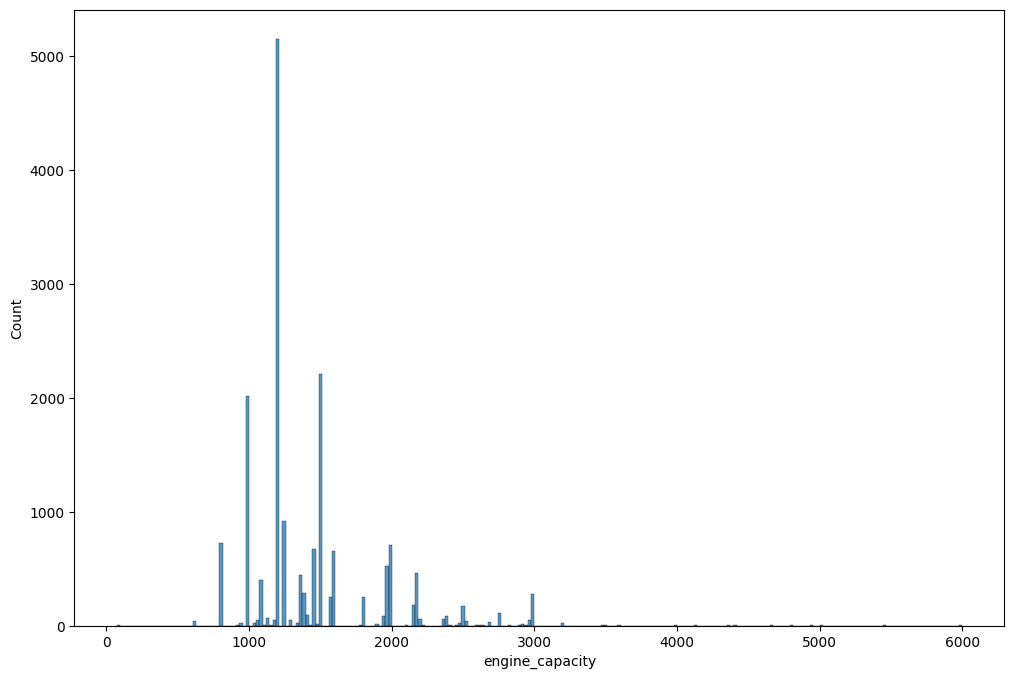

In [210]:
plt.figure(figsize= (12,8))
sns.histplot(data = Car_df,x='engine_capacity')

In [211]:
Car_df['engine_capacity'].unique()

array([1197., 2179., 1086., 1047., 1196., 1198., 1462., 1493., 1396.,
        998., 1496., 1364., 1498., 2360., 1248.,  796., 1199., 2494.,
       1186., 1968.,  999., 1399., 1956.,  814., 1461., 1061.,  995.,
       1499.,  799., 1120., 1586.,  936., 1353., 1451., 1497., 1582.,
       1368., 2354., 2184., 1995., 2499.,   nan, 1395., 1998., 1798.,
       2143., 2967., 1796., 2995., 2894., 1984., 1298., 2999., 1950.,
       2198., 1799., 1591.,  624., 1598., 1991., 1172., 2755., 1373.,
       1405., 2982., 1997., 2498., 1999., 3198.,  909., 1193., 2609.,
       2199., 3498., 2993., 3604., 2487., 2998., 2987., 1996., 1896.,
       4663., 2523., 2393., 4951., 1495., 1969., 1797.,  993., 1595.,
       1597., 1341., 1242., 2696., 2925., 2979., 2996., 4367., 2477.,
       4999., 2835., 1599., 1468., 2953., 1150., 2489., 1332., 2157.,
       1794., 2400., 1948., 1993., 2362., 2200., 2956., 1596., 1390.,
       1490., 5461., 2112., 1194., 2596., 2496., 1349., 1330., 4134.,
       2694., 1482.,

In [212]:
# Missing values imputation
Car_df['engine_capacity']=Car_df['engine_capacity'].fillna(Car_df['engine_capacity'].median()).astype(int)

In [213]:
Car_df['engine_capacity'].unique()

array([1197, 2179, 1086, 1047, 1196, 1198, 1462, 1493, 1396,  998, 1496,
       1364, 1498, 2360, 1248,  796, 1199, 2494, 1186, 1968,  999, 1399,
       1956,  814, 1461, 1061,  995, 1499,  799, 1120, 1586,  936, 1353,
       1451, 1497, 1582, 1368, 2354, 2184, 1995, 2499, 1395, 1998, 1798,
       2143, 2967, 1796, 2995, 2894, 1984, 1298, 2999, 1950, 2198, 1799,
       1591,  624, 1598, 1991, 1172, 2755, 1373, 1405, 2982, 1997, 2498,
       1999, 3198,  909, 1193, 2609, 2199, 3498, 2993, 3604, 2487, 2998,
       2987, 1996, 1896, 4663, 2523, 2393, 4951, 1495, 1969, 1797,  993,
       1595, 1597, 1341, 1242, 2696, 2925, 2979, 2996, 4367, 2477, 4999,
       2835, 1599, 1468, 2953, 1150, 2489, 1332, 2157, 1794, 2400, 1948,
       1993, 2362, 2200, 2956, 1596, 1390, 1490, 5461, 2112, 1194, 2596,
       2496, 1349, 1330, 4134, 2694, 1482, 2497, 3471, 2359, 5000, 2650,
       2231, 2446, 1985, 2148, 1781, 1898, 1299, 1339, 1389,   72, 1589,
       3597, 1422, 1108, 2698, 3200, 4806, 4395, 29

## Resale_Price

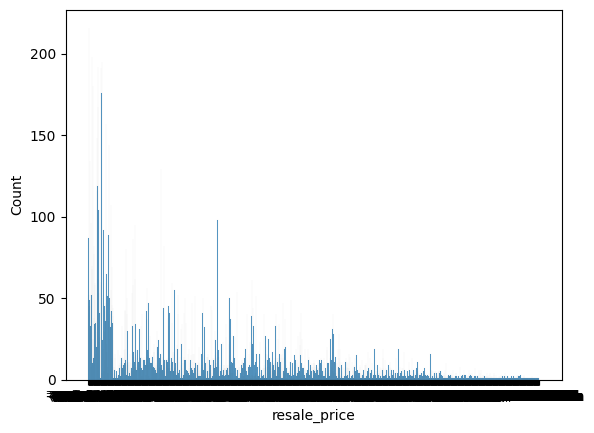

In [214]:
sns.histplot(Car_df['resale_price'])
plt.show()

In [215]:
# resale_price ->(Lakh = 100,000)
Car_df

,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city,registered_year_Imputation
0,2017 Maruti Baleno 1.2 Alpha,₹ 5.45 Lakh,2017,1197,Third Party insurance,Manual,"40,000 Kms",First Owner,Petrol,83.1bhp,5.0,21.4 kmpl,Hatchback,Agra,2017
1,2018 Tata Hexa XTA,₹ 10 Lakh,2018,2179,Third Party insurance,Automatic,"70,000 Kms",First Owner,Diesel,153.86bhp,7.0,17.6 kmpl,MUV,Agra,2018
2,2015 Maruti Swift Dzire VXI,₹ 4.50 Lakh,2015,1197,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan,Agra,2015
3,2015 Maruti Swift Dzire VXI,₹ 4.50 Lakh,2015,1197,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan,Agra,2015
4,2009 Hyundai i10 Magna 1.1,₹ 1.60 Lakh,2009,1086,Third Party insurance,Manual,"80,000 Kms",First Owner,Petrol,68.05bhp,5.0,19.81 kmpl,Hatchback,Agra,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17441,2013 Honda Amaze VX i-Vtech,₹ 3.25 Lakh,2013,1198,Comprehensive,Manual,"89,000 Kms",Second Owner,Petrol,86.7bhp,5.0,18 kmpl,Sedan,Delhi,2013
17442,2016 Toyota Camry 2.5 Hybrid,₹ 20.75 Lakh,2016,2494,Comprehensive,Automatic,"68,000 Kms",First Owner,Petrol,157.7bhp,5.0,19.16 kmpl,Sedan,Delhi,2016
17443,2016 Toyota Corolla Altis GL MT,₹ 8.35 Lakh,2016,1798,Comprehensive,Manual,"81,000 Kms",First Owner,Petrol,138.03bhp,5.0,14.28 kmpl,Sedan,Delhi,2016
17444,2019 Hyundai Creta 1.6 CRDi AT SX Plus,₹ 13.95 Lakh,2019,1582,Comprehensive,Automatic,"20,000 Kms",First Owner,Diesel,126.2bhp,5.0,17.01 kmpl,SUV,Delhi,2019


In [216]:
Car_df['resale_price'] = Car_df['resale_price'].str.replace(',', '')
Car_df['resale_price'] = Car_df['resale_price'].str.strip("₹ LakhCrore")
Car_df['resale_price'] = Car_df['resale_price'].astype(float)

In [217]:
Car_df['resale_price']=Car_df['resale_price']*100000
Car_df['resale_price']=Car_df['resale_price']
Car_df['resale_price']=Car_df['resale_price']*0.01111784
Car_df['resale_price']=Car_df['resale_price'].round(2)
#Car_df.rename(columns={'resale_price':'resale_price in (Dollars)'})

In [218]:
Car_df

,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city,registered_year_Imputation
0,2017 Maruti Baleno 1.2 Alpha,6059.22,2017,1197,Third Party insurance,Manual,"40,000 Kms",First Owner,Petrol,83.1bhp,5.0,21.4 kmpl,Hatchback,Agra,2017
1,2018 Tata Hexa XTA,11117.84,2018,2179,Third Party insurance,Automatic,"70,000 Kms",First Owner,Diesel,153.86bhp,7.0,17.6 kmpl,MUV,Agra,2018
2,2015 Maruti Swift Dzire VXI,5003.03,2015,1197,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan,Agra,2015
3,2015 Maruti Swift Dzire VXI,5003.03,2015,1197,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan,Agra,2015
4,2009 Hyundai i10 Magna 1.1,1778.85,2009,1086,Third Party insurance,Manual,"80,000 Kms",First Owner,Petrol,68.05bhp,5.0,19.81 kmpl,Hatchback,Agra,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17441,2013 Honda Amaze VX i-Vtech,3613.30,2013,1198,Comprehensive,Manual,"89,000 Kms",Second Owner,Petrol,86.7bhp,5.0,18 kmpl,Sedan,Delhi,2013
17442,2016 Toyota Camry 2.5 Hybrid,23069.52,2016,2494,Comprehensive,Automatic,"68,000 Kms",First Owner,Petrol,157.7bhp,5.0,19.16 kmpl,Sedan,Delhi,2016
17443,2016 Toyota Corolla Altis GL MT,9283.40,2016,1798,Comprehensive,Manual,"81,000 Kms",First Owner,Petrol,138.03bhp,5.0,14.28 kmpl,Sedan,Delhi,2016
17444,2019 Hyundai Creta 1.6 CRDi AT SX Plus,15509.39,2019,1582,Comprehensive,Automatic,"20,000 Kms",First Owner,Diesel,126.2bhp,5.0,17.01 kmpl,SUV,Delhi,2019


## **Kms_driven**

In [219]:
Car_df[Car_df['kms_driven'].isnull()]

,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city,registered_year_Imputation
733,2008 Maruti Wagon R LXI Minor,91002855.75,2008,1061,Not Available,Manual,NaN,First Owner,Petrol,67bhp,5.0,18.9 kmpl,Hatchback,Lucknow,2008
2089,2007 Maruti Swift Ldi BSII,80937875.20,2007,1248,Not Available,Manual,NaN,Second Owner,Diesel,75PS,5.0,17.8 kmpl,Hatchback,Jaipur,2007
9749,2016 Chevrolet Beat PS,2112.39,2016,1199,Not Available,Manual,NaN,First Owner,Petrol,76.8bhp,5.0,17.8 kmpl,Hatchback,Gurgaon,2016


In [220]:
Car_df['kms_driven']=Car_df['kms_driven'].str.strip("Kms ,")
Car_df['kms_driven']=Car_df['kms_driven'].str.replace(",","")
Car_df['kms_driven']=Car_df['kms_driven'].astype(float)
Car_df['kms_driven']=Car_df['kms_driven'].fillna(Car_df['kms_driven'].median())
Car_df['kms_driven']=Car_df['kms_driven'].astype(int)


In [221]:
Car_df['kms_driven'].unique()

array([ 40000,  70000,  80000, ..., 120178,    800,  67634])

In [222]:
Car_df

,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city,registered_year_Imputation
0,2017 Maruti Baleno 1.2 Alpha,6059.22,2017,1197,Third Party insurance,Manual,40000,First Owner,Petrol,83.1bhp,5.0,21.4 kmpl,Hatchback,Agra,2017
1,2018 Tata Hexa XTA,11117.84,2018,2179,Third Party insurance,Automatic,70000,First Owner,Diesel,153.86bhp,7.0,17.6 kmpl,MUV,Agra,2018
2,2015 Maruti Swift Dzire VXI,5003.03,2015,1197,Third Party insurance,Manual,70000,Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan,Agra,2015
3,2015 Maruti Swift Dzire VXI,5003.03,2015,1197,Third Party insurance,Manual,70000,Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan,Agra,2015
4,2009 Hyundai i10 Magna 1.1,1778.85,2009,1086,Third Party insurance,Manual,80000,First Owner,Petrol,68.05bhp,5.0,19.81 kmpl,Hatchback,Agra,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17441,2013 Honda Amaze VX i-Vtech,3613.30,2013,1198,Comprehensive,Manual,89000,Second Owner,Petrol,86.7bhp,5.0,18 kmpl,Sedan,Delhi,2013
17442,2016 Toyota Camry 2.5 Hybrid,23069.52,2016,2494,Comprehensive,Automatic,68000,First Owner,Petrol,157.7bhp,5.0,19.16 kmpl,Sedan,Delhi,2016
17443,2016 Toyota Corolla Altis GL MT,9283.40,2016,1798,Comprehensive,Manual,81000,First Owner,Petrol,138.03bhp,5.0,14.28 kmpl,Sedan,Delhi,2016
17444,2019 Hyundai Creta 1.6 CRDi AT SX Plus,15509.39,2019,1582,Comprehensive,Automatic,20000,First Owner,Diesel,126.2bhp,5.0,17.01 kmpl,SUV,Delhi,2019


In [223]:
Car_df['kms_driven']

,kms_driven
0,40000
1,70000
2,70000
3,70000
4,80000
...,...
17441,89000
17442,68000
17443,81000
17444,20000


In [224]:
Car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17446 entries, 0 to 17445
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   full_name                   17446 non-null  object 
 1   resale_price                17446 non-null  float64
 2   registered_year             17446 non-null  int64  
 3   engine_capacity             17446 non-null  int64  
 4   insurance                   17439 non-null  object 
 5   transmission_type           17446 non-null  object 
 6   kms_driven                  17446 non-null  int64  
 7   owner_type                  17401 non-null  object 
 8   fuel_type                   17446 non-null  object 
 9   max_power                   17344 non-null  object 
 10  seats                       17436 non-null  float64
 11  mileage                     16938 non-null  object 
 12  body_type                   17446 non-null  object 
 13  city                        174

## insurance


In [225]:
Car_df

,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city,registered_year_Imputation
0,2017 Maruti Baleno 1.2 Alpha,6059.22,2017,1197,Third Party insurance,Manual,40000,First Owner,Petrol,83.1bhp,5.0,21.4 kmpl,Hatchback,Agra,2017
1,2018 Tata Hexa XTA,11117.84,2018,2179,Third Party insurance,Automatic,70000,First Owner,Diesel,153.86bhp,7.0,17.6 kmpl,MUV,Agra,2018
2,2015 Maruti Swift Dzire VXI,5003.03,2015,1197,Third Party insurance,Manual,70000,Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan,Agra,2015
3,2015 Maruti Swift Dzire VXI,5003.03,2015,1197,Third Party insurance,Manual,70000,Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan,Agra,2015
4,2009 Hyundai i10 Magna 1.1,1778.85,2009,1086,Third Party insurance,Manual,80000,First Owner,Petrol,68.05bhp,5.0,19.81 kmpl,Hatchback,Agra,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17441,2013 Honda Amaze VX i-Vtech,3613.30,2013,1198,Comprehensive,Manual,89000,Second Owner,Petrol,86.7bhp,5.0,18 kmpl,Sedan,Delhi,2013
17442,2016 Toyota Camry 2.5 Hybrid,23069.52,2016,2494,Comprehensive,Automatic,68000,First Owner,Petrol,157.7bhp,5.0,19.16 kmpl,Sedan,Delhi,2016
17443,2016 Toyota Corolla Altis GL MT,9283.40,2016,1798,Comprehensive,Manual,81000,First Owner,Petrol,138.03bhp,5.0,14.28 kmpl,Sedan,Delhi,2016
17444,2019 Hyundai Creta 1.6 CRDi AT SX Plus,15509.39,2019,1582,Comprehensive,Automatic,20000,First Owner,Diesel,126.2bhp,5.0,17.01 kmpl,SUV,Delhi,2019


In [226]:
Car_df['insurance'].unique()

array(['Third Party insurance', 'Comprehensive', 'Zero Dep',
       'Third Party', 'Not Available', nan, '2', '1'], dtype=object)

In [227]:
insurance={
    'Third Party insurance':"Third Party",
    '1': np.nan,
    '2': np.nan,
    'Not Available':np.nan
}
Car_df['insurance']=Car_df['insurance'].replace(insurance)
Car_df['insurance']=Car_df['insurance'].replace(np.nan,"No Insurance")

In [228]:
Car_df['insurance'].unique()

array(['Third Party', 'Comprehensive', 'Zero Dep', 'No Insurance'],
      dtype=object)

## Owner Type Column Still Have NULLS !!

In [229]:
Car_df['owner_type'].unique()

array(['First Owner', 'Second Owner', 'Third Owner', 'Fifth Owner',
       'Fourth Owner', nan], dtype=object)

In [230]:
Car_df[Car_df['owner_type'].isnull()][['kms_driven']]
print(Car_df[Car_df['owner_type'].isnull()][['kms_driven']].describe())

          kms_driven
count      45.000000
mean    35692.577778
std     40055.090758
min      2000.000000
25%      9900.000000
50%     15100.000000
75%     60611.000000
max    167332.000000


In [231]:
bins = [0, 20000, 60000, 100000, float('inf')]
labels = ['0-20k', '20k-60k', '60k-100k', '100k+']
Car_df['km_group'] = pd.cut(Car_df['kms_driven'], bins=bins, labels=labels)
relation = pd.crosstab(Car_df['km_group'], Car_df['owner_type'])
print(relation)

owner_type  Fifth Owner  First Owner  Fourth Owner  Second Owner  Third Owner
km_group                                                                     
0-20k                 0         2089             2           236           20
20k-60k               4         5753            13          1671          219
60k-100k             30         3462            62          1695          360
100k+                17          989            50           548          181


In [232]:
bins = [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000,
        50000, 55000, 60000, 65000, 70000, 75000, 80000, 85000, 90000, 95000,
        100000, float('inf')]
labels = [
    '0-5k', '5k-10k', '10k-15k', '15k-20k', '20k-25k', '25k-30k',
    '30k-35k', '35k-40k', '40k-45k', '45k-50k', '50k-55k', '55k-60k',
    '60k-65k', '65k-70k', '70k-75k', '75k-80k', '80k-85k', '85k-90k',
    '90k-95k', '95k-100k', '100k+']
Car_df['km_group'] = pd.cut(Car_df['kms_driven'], bins=bins, labels=labels)
relation = pd.crosstab(Car_df['km_group'], Car_df['owner_type'])
print(relation)

owner_type  Fifth Owner  First Owner  Fourth Owner  Second Owner  Third Owner
km_group                                                                     
0-5k                  0          189             0            15            1
5k-10k                0          627             2            52            5
10k-15k               0          444             0            43            2
15k-20k               0          829             0           126           12
20k-25k               0          528             1           115            9
25k-30k               0          858             0           216           24
30k-35k               0          592             1           135           12
35k-40k               1          895             1           237           38
40k-45k               0          628             0           164           16
45k-50k               0          869             1           287           44
50k-55k               0          577             1           178

In [233]:
Car_df

,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city,registered_year_Imputation,km_group
0,2017 Maruti Baleno 1.2 Alpha,6059.22,2017,1197,Third Party,Manual,40000,First Owner,Petrol,83.1bhp,5.0,21.4 kmpl,Hatchback,Agra,2017,35k-40k
1,2018 Tata Hexa XTA,11117.84,2018,2179,Third Party,Automatic,70000,First Owner,Diesel,153.86bhp,7.0,17.6 kmpl,MUV,Agra,2018,65k-70k
2,2015 Maruti Swift Dzire VXI,5003.03,2015,1197,Third Party,Manual,70000,Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan,Agra,2015,65k-70k
3,2015 Maruti Swift Dzire VXI,5003.03,2015,1197,Third Party,Manual,70000,Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan,Agra,2015,65k-70k
4,2009 Hyundai i10 Magna 1.1,1778.85,2009,1086,Third Party,Manual,80000,First Owner,Petrol,68.05bhp,5.0,19.81 kmpl,Hatchback,Agra,2009,75k-80k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17441,2013 Honda Amaze VX i-Vtech,3613.30,2013,1198,Comprehensive,Manual,89000,Second Owner,Petrol,86.7bhp,5.0,18 kmpl,Sedan,Delhi,2013,85k-90k
17442,2016 Toyota Camry 2.5 Hybrid,23069.52,2016,2494,Comprehensive,Automatic,68000,First Owner,Petrol,157.7bhp,5.0,19.16 kmpl,Sedan,Delhi,2016,65k-70k
17443,2016 Toyota Corolla Altis GL MT,9283.40,2016,1798,Comprehensive,Manual,81000,First Owner,Petrol,138.03bhp,5.0,14.28 kmpl,Sedan,Delhi,2016,80k-85k
17444,2019 Hyundai Creta 1.6 CRDi AT SX Plus,15509.39,2019,1582,Comprehensive,Automatic,20000,First Owner,Diesel,126.2bhp,5.0,17.01 kmpl,SUV,Delhi,2019,15k-20k


## max_power (Yasser)



In [234]:
Car_df['max_power']=Car_df['max_power'].str.strip(" ")
Car_df['max_power']=Car_df['max_power'].replace(".","")


In [235]:
Car_df['max_power'].unique()

array(['83.1bhp', '153.86bhp', '83.14bhp', '68.05bhp', '81.86bhp',
       '69bhp', '73bhp', '62bhp', '86.7bhp', '103.25bhp', '98.6bhp',
       '89bhp', '67.1bhp', '58.16bhp', '88.7bhp', '87.2bhp', '118.36bhp',
       '89.84bhp', '170PS', '74bhp', '81.80bhp', '47.3bhp', '67.04bhp',
       '82bhp', '140bhp', '138.1bhp', '84bhp', '88.5bhp', '88.50bhp',
       '65.71bhp', '47.33bhp', '100.6bhp', '102', '90 PS', '73.97bhp',
       '61.7bhp', '147.51bhp', '73.9bhp', '62.1bhp', '78.9bhp',
       '108.62bhp', '167.67bhp', '55.2bhp', '86.63bhp', '88bhp',
       '67.06bhp', '83.8bhp', '113.43bhp', '74.02bhp', '67.05bhp',
       '67bhp', '63PS at 5,400 rpm', '98.96bhp', '97.9bhp', nan,
       '58.2bhp', '53.3bhp', '70bhp', '103.3bhp', '120bhp (86.7kw)',
       '118.35bhp', '75 PS at 4000 rpm', '152.87bhp', '57.6bhp', '99bhp',
       '138bhp', '141bhp', '108.5bhp', '86.8bhp', '78 kW', '105.94bhp',
       '118PS at 6,600 rpm', '72bhp', '61.68bhp', '108.45bhp', '88.73bhp',
       '74.96bhp', '126.2b

In [236]:
mp = Car_df["max_power"].astype(str)

In [237]:
is_ps = mp.str.contains("PS", case=False, na=False)

In [238]:
max_power_numeric = mp.str.extract(r"([0-9]*\.?[0-9]+)")[0].astype(float)

In [239]:
max_power_numeric[is_ps] = max_power_numeric[is_ps] * 0.98632

In [240]:
Car_df["max_power_bhp"] = max_power_numeric

In [241]:
Car_df["max_power_bhp"] = Car_df["max_power_bhp"].fillna(Car_df["max_power_bhp"].median())

In [242]:
Car_df.to_csv("Cars_cleaned.csv", index=False)

In [243]:
Car_df

,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city,registered_year_Imputation,km_group,max_power_bhp
0,2017 Maruti Baleno 1.2 Alpha,6059.22,2017,1197,Third Party,Manual,40000,First Owner,Petrol,83.1bhp,5.0,21.4 kmpl,Hatchback,Agra,2017,35k-40k,83.10
1,2018 Tata Hexa XTA,11117.84,2018,2179,Third Party,Automatic,70000,First Owner,Diesel,153.86bhp,7.0,17.6 kmpl,MUV,Agra,2018,65k-70k,153.86
2,2015 Maruti Swift Dzire VXI,5003.03,2015,1197,Third Party,Manual,70000,Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan,Agra,2015,65k-70k,83.14
3,2015 Maruti Swift Dzire VXI,5003.03,2015,1197,Third Party,Manual,70000,Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan,Agra,2015,65k-70k,83.14
4,2009 Hyundai i10 Magna 1.1,1778.85,2009,1086,Third Party,Manual,80000,First Owner,Petrol,68.05bhp,5.0,19.81 kmpl,Hatchback,Agra,2009,75k-80k,68.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17441,2013 Honda Amaze VX i-Vtech,3613.30,2013,1198,Comprehensive,Manual,89000,Second Owner,Petrol,86.7bhp,5.0,18 kmpl,Sedan,Delhi,2013,85k-90k,86.70
17442,2016 Toyota Camry 2.5 Hybrid,23069.52,2016,2494,Comprehensive,Automatic,68000,First Owner,Petrol,157.7bhp,5.0,19.16 kmpl,Sedan,Delhi,2016,65k-70k,157.70
17443,2016 Toyota Corolla Altis GL MT,9283.40,2016,1798,Comprehensive,Manual,81000,First Owner,Petrol,138.03bhp,5.0,14.28 kmpl,Sedan,Delhi,2016,80k-85k,138.03
17444,2019 Hyundai Creta 1.6 CRDi AT SX Plus,15509.39,2019,1582,Comprehensive,Automatic,20000,First Owner,Diesel,126.2bhp,5.0,17.01 kmpl,SUV,Delhi,2019,15k-20k,126.20


In [244]:
Car_df['max_power'].unique()

array(['83.1bhp', '153.86bhp', '83.14bhp', '68.05bhp', '81.86bhp',
       '69bhp', '73bhp', '62bhp', '86.7bhp', '103.25bhp', '98.6bhp',
       '89bhp', '67.1bhp', '58.16bhp', '88.7bhp', '87.2bhp', '118.36bhp',
       '89.84bhp', '170PS', '74bhp', '81.80bhp', '47.3bhp', '67.04bhp',
       '82bhp', '140bhp', '138.1bhp', '84bhp', '88.5bhp', '88.50bhp',
       '65.71bhp', '47.33bhp', '100.6bhp', '102', '90 PS', '73.97bhp',
       '61.7bhp', '147.51bhp', '73.9bhp', '62.1bhp', '78.9bhp',
       '108.62bhp', '167.67bhp', '55.2bhp', '86.63bhp', '88bhp',
       '67.06bhp', '83.8bhp', '113.43bhp', '74.02bhp', '67.05bhp',
       '67bhp', '63PS at 5,400 rpm', '98.96bhp', '97.9bhp', nan,
       '58.2bhp', '53.3bhp', '70bhp', '103.3bhp', '120bhp (86.7kw)',
       '118.35bhp', '75 PS at 4000 rpm', '152.87bhp', '57.6bhp', '99bhp',
       '138bhp', '141bhp', '108.5bhp', '86.8bhp', '78 kW', '105.94bhp',
       '118PS at 6,600 rpm', '72bhp', '61.68bhp', '108.45bhp', '88.73bhp',
       '74.96bhp', '126.2b

# تجارب

In [ ]:
import re

#1) Standardize text
s = Car_df["max_power"].astype(str).str.strip()
s_lower = s.str.lower()

# Helper: first number in string
def get_first_number(x):
    m = re.search(r"[0-9].?[0-9]+", x)
    return float(m.group()) if m else np.nan

clean_vals = []

for txt, low in zip(s, s_lower):
    v = get_first_number(txt)      # base numeric
    if np.isnan(v):
        clean_vals.append(np.nan)
        continue

    # If PS → convert PS to bhp
    if "ps" in low:
        v = v * 0.98632

    # If kW → convert kW to bhp
    if "kw" in low:
        v = v * 1.34102

    # If bhp or no unit → keep v as bhp
    clean_vals.append(v)

#2) Create clean column
clean_series = pd.Series(clean_vals)

#3) Fill missing with median so NOTHING is missing
median_val = clean_series.median()
clean_series = clean_series.fillna(median_val).round(2)

Car_df["max_power_clean_bhp"] = clean_series

In [ ]:
Car_df


,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city,registered_year_Imputation,km_group,max_power_bhp,mileage_number,mileage_unit,max_power_clean_bhp
0,2017 Maruti Baleno 1.2 Alpha,6059.22,2017,1197,Third Party,Manual,40000,First Owner,Petrol,83.1bhp,5,21.4 kmpl,Hatchback,Agra,2017,35k-40k,83.10,21.40,kmpl,83.0
1,2018 Tata Hexa XTA,11117.84,2018,2179,Third Party,Automatic,70000,First Owner,Diesel,153.86bhp,7,17.6 kmpl,MUV,Agra,2018,65k-70k,153.86,17.60,kmpl,153.0
2,2015 Maruti Swift Dzire VXI,5003.03,2015,1197,Third Party,Manual,70000,Second Owner,Petrol,83.14bhp,5,20.85 kmpl,Sedan,Agra,2015,65k-70k,83.14,20.85,kmpl,83.0
3,2015 Maruti Swift Dzire VXI,5003.03,2015,1197,Third Party,Manual,70000,Second Owner,Petrol,83.14bhp,5,20.85 kmpl,Sedan,Agra,2015,65k-70k,83.14,20.85,kmpl,83.0
4,2009 Hyundai i10 Magna 1.1,1778.85,2009,1086,Third Party,Manual,80000,First Owner,Petrol,68.05bhp,5,19.81 kmpl,Hatchback,Agra,2009,75k-80k,68.05,19.81,kmpl,68.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17441,2013 Honda Amaze VX i-Vtech,3613.30,2013,1198,Comprehensive,Manual,89000,Second Owner,Petrol,86.7bhp,5,18 kmpl,Sedan,Delhi,2013,85k-90k,86.70,18.00,kmpl,86.0
17442,2016 Toyota Camry 2.5 Hybrid,23069.52,2016,2494,Comprehensive,Automatic,68000,First Owner,Petrol,157.7bhp,5,19.16 kmpl,Sedan,Delhi,2016,65k-70k,157.70,19.16,kmpl,157.0
17443,2016 Toyota Corolla Altis GL MT,9283.40,2016,1798,Comprehensive,Manual,81000,First Owner,Petrol,138.03bhp,5,14.28 kmpl,Sedan,Delhi,2016,80k-85k,138.03,14.28,kmpl,138.0
17444,2019 Hyundai Creta 1.6 CRDi AT SX Plus,15509.39,2019,1582,Comprehensive,Automatic,20000,First Owner,Diesel,126.2bhp,5,17.01 kmpl,SUV,Delhi,2019,15k-20k,126.20,17.01,kmpl,126.0


# Seats Column

In [ ]:
median=Car_df['seats'].median()
Car_df['seats']=Car_df['seats'].fillna(median)
Car_df['seats']=Car_df['seats'].astype(int)

In [ ]:
Car_df


,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city,registered_year_Imputation,km_group,max_power_bhp,max_power_clean_bhp
0,2017 Maruti Baleno 1.2 Alpha,6059.22,2017,1197,Third Party,Manual,40000,First Owner,Petrol,83.1bhp,5,21.4 kmpl,Hatchback,Agra,2017,35k-40k,83.10,83.0
1,2018 Tata Hexa XTA,11117.84,2018,2179,Third Party,Automatic,70000,First Owner,Diesel,153.86bhp,7,17.6 kmpl,MUV,Agra,2018,65k-70k,153.86,153.0
2,2015 Maruti Swift Dzire VXI,5003.03,2015,1197,Third Party,Manual,70000,Second Owner,Petrol,83.14bhp,5,20.85 kmpl,Sedan,Agra,2015,65k-70k,83.14,83.0
3,2015 Maruti Swift Dzire VXI,5003.03,2015,1197,Third Party,Manual,70000,Second Owner,Petrol,83.14bhp,5,20.85 kmpl,Sedan,Agra,2015,65k-70k,83.14,83.0
4,2009 Hyundai i10 Magna 1.1,1778.85,2009,1086,Third Party,Manual,80000,First Owner,Petrol,68.05bhp,5,19.81 kmpl,Hatchback,Agra,2009,75k-80k,68.05,68.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17441,2013 Honda Amaze VX i-Vtech,3613.30,2013,1198,Comprehensive,Manual,89000,Second Owner,Petrol,86.7bhp,5,18 kmpl,Sedan,Delhi,2013,85k-90k,86.70,86.0
17442,2016 Toyota Camry 2.5 Hybrid,23069.52,2016,2494,Comprehensive,Automatic,68000,First Owner,Petrol,157.7bhp,5,19.16 kmpl,Sedan,Delhi,2016,65k-70k,157.70,157.0
17443,2016 Toyota Corolla Altis GL MT,9283.40,2016,1798,Comprehensive,Manual,81000,First Owner,Petrol,138.03bhp,5,14.28 kmpl,Sedan,Delhi,2016,80k-85k,138.03,138.0
17444,2019 Hyundai Creta 1.6 CRDi AT SX Plus,15509.39,2019,1582,Comprehensive,Automatic,20000,First Owner,Diesel,126.2bhp,5,17.01 kmpl,SUV,Delhi,2019,15k-20k,126.20,126.0


In [ ]:
Car_df['seats'].unique()

array([ 5,  7,  8,  6,  4,  9,  2, 10, 14])

# Mileage (Have Nulls)
I Kept Them

In [ ]:
Car_df[['mileage_number', 'mileage_unit']] = Car_df['mileage'].str.split(' ', expand=True)
Car_df['mileage_number'] = Car_df['mileage_number'].astype(float)
Car_df[['mileage', 'mileage_number', 'mileage_unit']].head()

,mileage,mileage_number,mileage_unit
0,21.4 kmpl,21.40,kmpl
1,17.6 kmpl,17.60,kmpl
2,20.85 kmpl,20.85,kmpl
3,20.85 kmpl,20.85,kmpl
4,19.81 kmpl,19.81,kmpl


In [ ]:
Car_df[Car_df['mileage_number'].isna()]

,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city,registered_year_Imputation,km_group,max_power_bhp,max_power_clean_bhp,mileage_number,mileage_unit
9,2009 Hyundai Santro Xing GL,1334.14,2009,1086,Third Party,Manual,30000,First Owner,Petrol,62bhp,5,NaN,Hatchback,Agra,2009,25k-30k,62.00,62.00,NaN,NaN
166,2020 Maruti Celerio Tour 2018-2021 H2 CNG,3802.30,2020,998,Third Party,Manual,150000,First Owner,CNG,NaN,5,NaN,Hatchback,Agra,2020,100k+,88.50,88.00,NaN,NaN
205,2021 Audi e-tron 55 Sportback,107620.69,2021,1248,Third Party,Automatic,10500,First Owner,Electric,300kWbhp,5,NaN,SUV,Gurgaon,2021,10k-15k,300.00,402.31,NaN,NaN
215,2022 Audi e-tron 55 Sportback,1156.26,2022,1248,Third Party,Automatic,9900,NaN,Electric,300kWbhp,5,NaN,SUV,Gurgaon,2022,5k-10k,300.00,402.31,NaN,NaN
254,2020 Mercedes-Benz GLE 450 BSVI,102006.18,2020,2999,Third Party,Automatic,50852,First Owner,Petrol,362.07bhp,5,NaN,SUV,Delhi,2020,50k-55k,362.07,362.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17324,2022 Mercedes-Benz GLA 220d BSVI,53921.52,2022,1950,Comprehensive,Automatic,12000,First Owner,Diesel,187.74bhp,5,NaN,SUV,Delhi,2022,10k-15k,187.74,187.00,NaN,NaN
17332,2022 Mahindra XUV700 AX7 Diesel AT Luxury Pack...,31685.84,2023,2198,Comprehensive,Automatic,20000,First Owner,Diesel,182.38bhp,7,NaN,SUV,Delhi,2022,15k-20k,182.38,182.00,NaN,NaN
17333,2023 Hyundai Creta EX BSVI,15009.08,2023,1497,Comprehensive,Manual,2500,First Owner,Petrol,113.18bhp,5,NaN,SUV,Delhi,2023,0-5k,113.18,113.00,NaN,NaN
17346,2021 Toyota Fortuner Legender 4x2 AT,48807.32,2021,2755,Comprehensive,Automatic,31000,First Owner,Diesel,201.15bhp,7,NaN,SUV,Delhi,2021,30k-35k,201.15,201.00,NaN,NaN


In [ ]:
Car_df['mileage_unit'].unique()

array(['kmpl', nan, 'km/kg'], dtype=object)

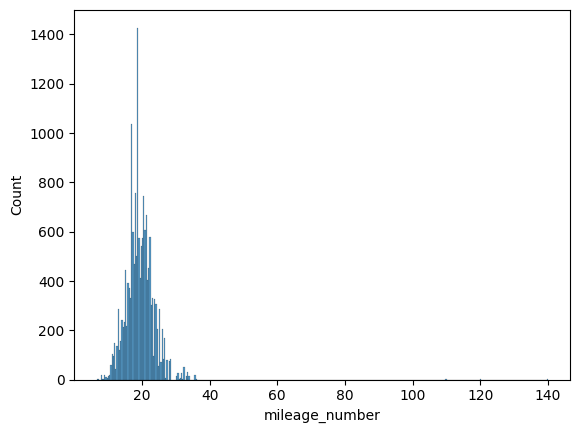

In [ ]:
sns.histplot(Car_df['mileage_number'])
plt.show()

In [ ]:
Missing_Summary=pd.DataFrame({
    'Number Of Nulls':Car_df.isna().sum(),
    'Nulls Precentage':round((Car_df.isna().sum()/len(Car_df))*100,2)
})
Missing_Summary

,Number Of Nulls,Nulls Precentage
full_name,0,0.00
resale_price,0,0.00
registered_year,0,0.00
engine_capacity,0,0.00
insurance,0,0.00
transmission_type,0,0.00
kms_driven,0,0.00
owner_type,45,0.26
fuel_type,0,0.00
max_power,102,0.58


# Body_Type

In [ ]:
Car_df['body_type'].unique()

array(['Hatchback', 'MUV', 'Sedan', 'Minivans', 'SUV', 'Toyota', 'Coupe',
       'Chevrolet', 'Mercedes-Benz', 'Audi', 'Maruti', 'Pickup',
       'Porsche', 'Tata', 'Mahindra', 'Volvo', 'Jaguar', 'BMW', 'Cars',
       'Datsun', 'Hyundai', 'Honda', 'Convertibles', 'Wagon', 'Skoda',
       'Isuzu'], dtype=object)

In [ ]:
Car_df

,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city,registered_year_Imputation,km_group,max_power_bhp,max_power_clean_bhp,mileage_number,mileage_unit
0,2017 Maruti Baleno 1.2 Alpha,6059.22,2017,1197,Third Party,Manual,40000,First Owner,Petrol,83.1bhp,5,21.4 kmpl,Hatchback,Agra,2017,35k-40k,83.10,83.0,21.40,kmpl
1,2018 Tata Hexa XTA,11117.84,2018,2179,Third Party,Automatic,70000,First Owner,Diesel,153.86bhp,7,17.6 kmpl,MUV,Agra,2018,65k-70k,153.86,153.0,17.60,kmpl
2,2015 Maruti Swift Dzire VXI,5003.03,2015,1197,Third Party,Manual,70000,Second Owner,Petrol,83.14bhp,5,20.85 kmpl,Sedan,Agra,2015,65k-70k,83.14,83.0,20.85,kmpl
3,2015 Maruti Swift Dzire VXI,5003.03,2015,1197,Third Party,Manual,70000,Second Owner,Petrol,83.14bhp,5,20.85 kmpl,Sedan,Agra,2015,65k-70k,83.14,83.0,20.85,kmpl
4,2009 Hyundai i10 Magna 1.1,1778.85,2009,1086,Third Party,Manual,80000,First Owner,Petrol,68.05bhp,5,19.81 kmpl,Hatchback,Agra,2009,75k-80k,68.05,68.0,19.81,kmpl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17441,2013 Honda Amaze VX i-Vtech,3613.30,2013,1198,Comprehensive,Manual,89000,Second Owner,Petrol,86.7bhp,5,18 kmpl,Sedan,Delhi,2013,85k-90k,86.70,86.0,18.00,kmpl
17442,2016 Toyota Camry 2.5 Hybrid,23069.52,2016,2494,Comprehensive,Automatic,68000,First Owner,Petrol,157.7bhp,5,19.16 kmpl,Sedan,Delhi,2016,65k-70k,157.70,157.0,19.16,kmpl
17443,2016 Toyota Corolla Altis GL MT,9283.40,2016,1798,Comprehensive,Manual,81000,First Owner,Petrol,138.03bhp,5,14.28 kmpl,Sedan,Delhi,2016,80k-85k,138.03,138.0,14.28,kmpl
17444,2019 Hyundai Creta 1.6 CRDi AT SX Plus,15509.39,2019,1582,Comprehensive,Automatic,20000,First Owner,Diesel,126.2bhp,5,17.01 kmpl,SUV,Delhi,2019,15k-20k,126.20,126.0,17.01,kmpl


# Duplicate

In [ ]:
Car_df.duplicated().sum()

np.int64(212)

In [ ]:
Car_df.shape

(17234, 20)

In [ ]:
Car_df.drop_duplicates(inplace=True)


In [ ]:
Car_df.shape

(17234, 20)

In [ ]:
Car_df.duplicated().sum()

np.int64(0)

In [ ]:
Car_df

,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city,registered_year_Imputation,km_group,max_power_bhp,max_power_clean_bhp,mileage_number,mileage_unit
0,2017 Maruti Baleno 1.2 Alpha,6059.22,2017,1197,Third Party,Manual,40000,First Owner,Petrol,83.1bhp,5,21.4 kmpl,Hatchback,Agra,2017,35k-40k,83.10,83.0,21.40,kmpl
1,2018 Tata Hexa XTA,11117.84,2018,2179,Third Party,Automatic,70000,First Owner,Diesel,153.86bhp,7,17.6 kmpl,MUV,Agra,2018,65k-70k,153.86,153.0,17.60,kmpl
2,2015 Maruti Swift Dzire VXI,5003.03,2015,1197,Third Party,Manual,70000,Second Owner,Petrol,83.14bhp,5,20.85 kmpl,Sedan,Agra,2015,65k-70k,83.14,83.0,20.85,kmpl
4,2009 Hyundai i10 Magna 1.1,1778.85,2009,1086,Third Party,Manual,80000,First Owner,Petrol,68.05bhp,5,19.81 kmpl,Hatchback,Agra,2009,75k-80k,68.05,68.0,19.81,kmpl
5,2015 Hyundai i20 Active 1.2,5225.38,2015,1197,Third Party,Manual,70000,First Owner,Petrol,81.86bhp,5,17.19 kmpl,Hatchback,Agra,2015,65k-70k,81.86,81.0,17.19,kmpl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17441,2013 Honda Amaze VX i-Vtech,3613.30,2013,1198,Comprehensive,Manual,89000,Second Owner,Petrol,86.7bhp,5,18 kmpl,Sedan,Delhi,2013,85k-90k,86.70,86.0,18.00,kmpl
17442,2016 Toyota Camry 2.5 Hybrid,23069.52,2016,2494,Comprehensive,Automatic,68000,First Owner,Petrol,157.7bhp,5,19.16 kmpl,Sedan,Delhi,2016,65k-70k,157.70,157.0,19.16,kmpl
17443,2016 Toyota Corolla Altis GL MT,9283.40,2016,1798,Comprehensive,Manual,81000,First Owner,Petrol,138.03bhp,5,14.28 kmpl,Sedan,Delhi,2016,80k-85k,138.03,138.0,14.28,kmpl
17444,2019 Hyundai Creta 1.6 CRDi AT SX Plus,15509.39,2019,1582,Comprehensive,Automatic,20000,First Owner,Diesel,126.2bhp,5,17.01 kmpl,SUV,Delhi,2019,15k-20k,126.20,126.0,17.01,kmpl


# EDA

#resale_price coulmn

In [ ]:
Car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17446 entries, 0 to 17445
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   full_name          17446 non-null  object 
 1   resale_price       17446 non-null  object 
 2   registered_year    17377 non-null  object 
 3   engine_capacity    17432 non-null  object 
 4   insurance          17439 non-null  object 
 5   transmission_type  17446 non-null  object 
 6   kms_driven         17443 non-null  object 
 7   owner_type         17401 non-null  object 
 8   fuel_type          17446 non-null  object 
 9   max_power          17344 non-null  object 
 10  seats              17436 non-null  float64
 11  mileage            16938 non-null  object 
 12  body_type          17446 non-null  object 
 13  city               17446 non-null  object 
dtypes: float64(1), object(13)
memory usage: 1.9+ MB


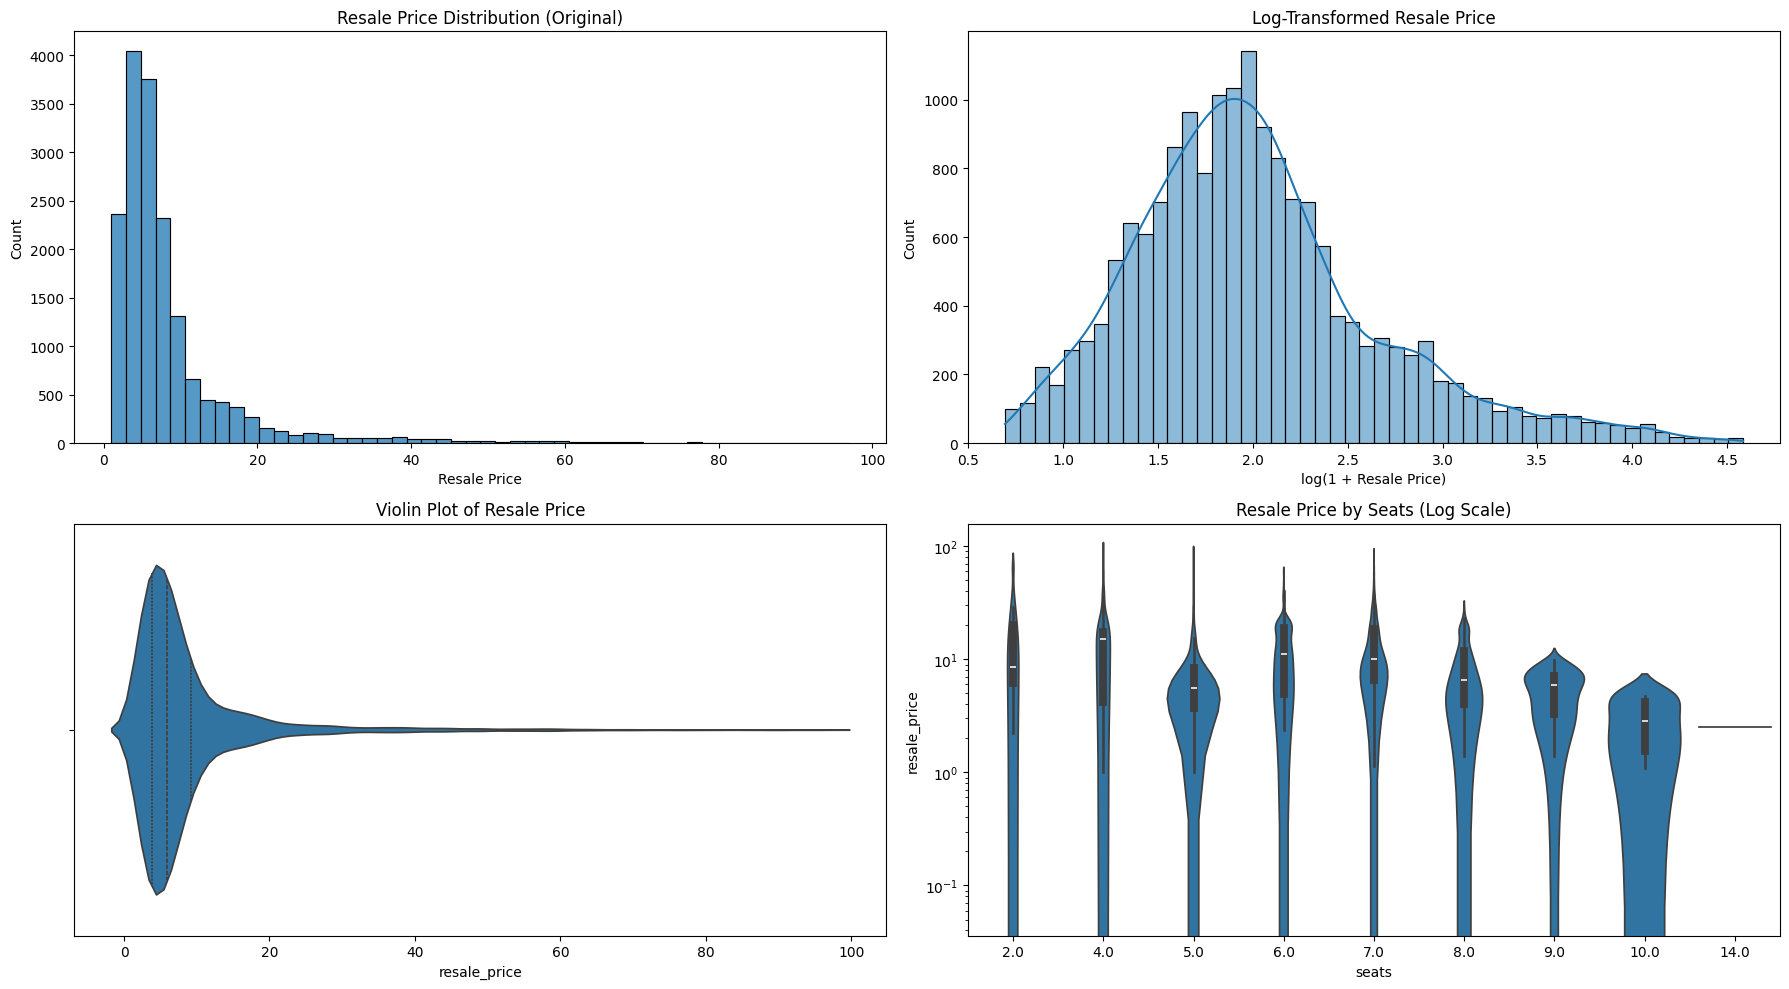

In [ ]:

plt.figure(figsize=(18, 10))

# --- 1. Histogram of resale_price (NO transformation) ---
plt.subplot(2, 2, 1)
sns.histplot(Car_df['resale_price'], bins=50)
plt.title("Resale Price Distribution (Original)")
plt.xlabel("Resale Price")
plt.ylabel("Count")

# --- 2. Log-transformed histogram ---
plt.subplot(2, 2, 2)
sns.histplot(np.log1p(Car_df['resale_price']), bins=50, kde=True)
plt.title("Log-Transformed Resale Price")
plt.xlabel("log(1 + Resale Price)")

# --- 3. Violin plot of resale_price ---
plt.subplot(2, 2, 3)
sns.violinplot(x=Car_df['resale_price'], inner="quartile")
plt.title("Violin Plot of Resale Price")

# --- 4. Violin plot seats vs resale_price (log scale) ---
plt.subplot(2, 2, 4)
sns.violinplot(x='seats', y='resale_price', data=Car_df)
plt.yscale('log')
plt.title("Resale Price by Seats (Log Scale)")

plt.tight_layout()
plt.show()


After we transform the resale price by taking log , we see that the column become normal distributed but stil there some outlier

#registred_year_column

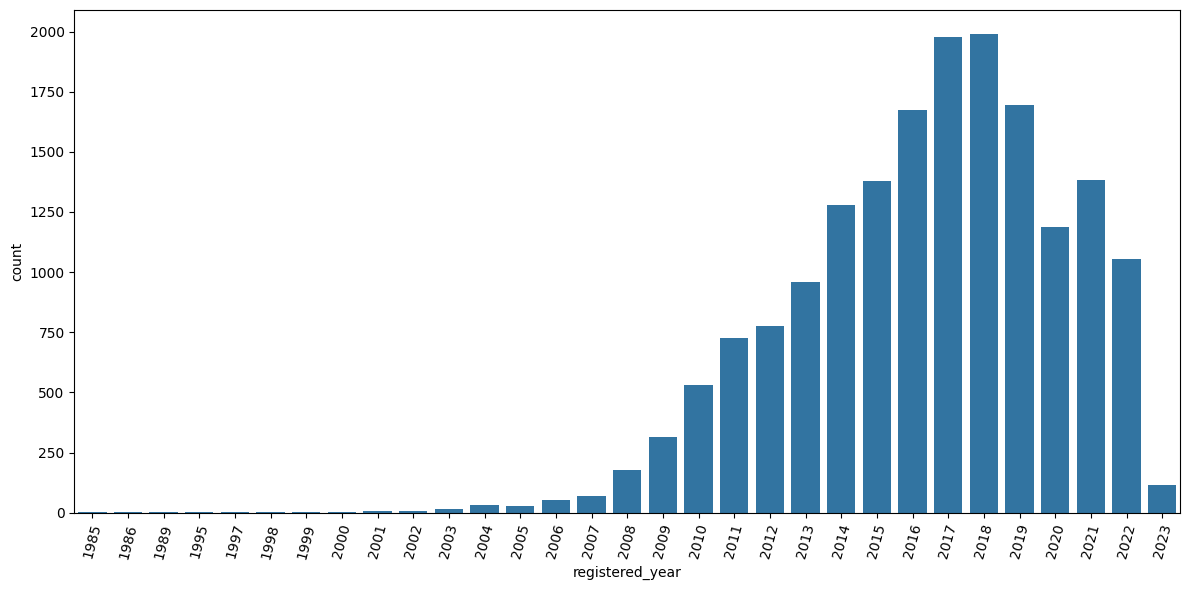

In [ ]:
plt.figure(figsize=(12,6))
a = sns.countplot(x = Car_df["registered_year"])
a.tick_params(axis='x', rotation=75)
plt.tight_layout()

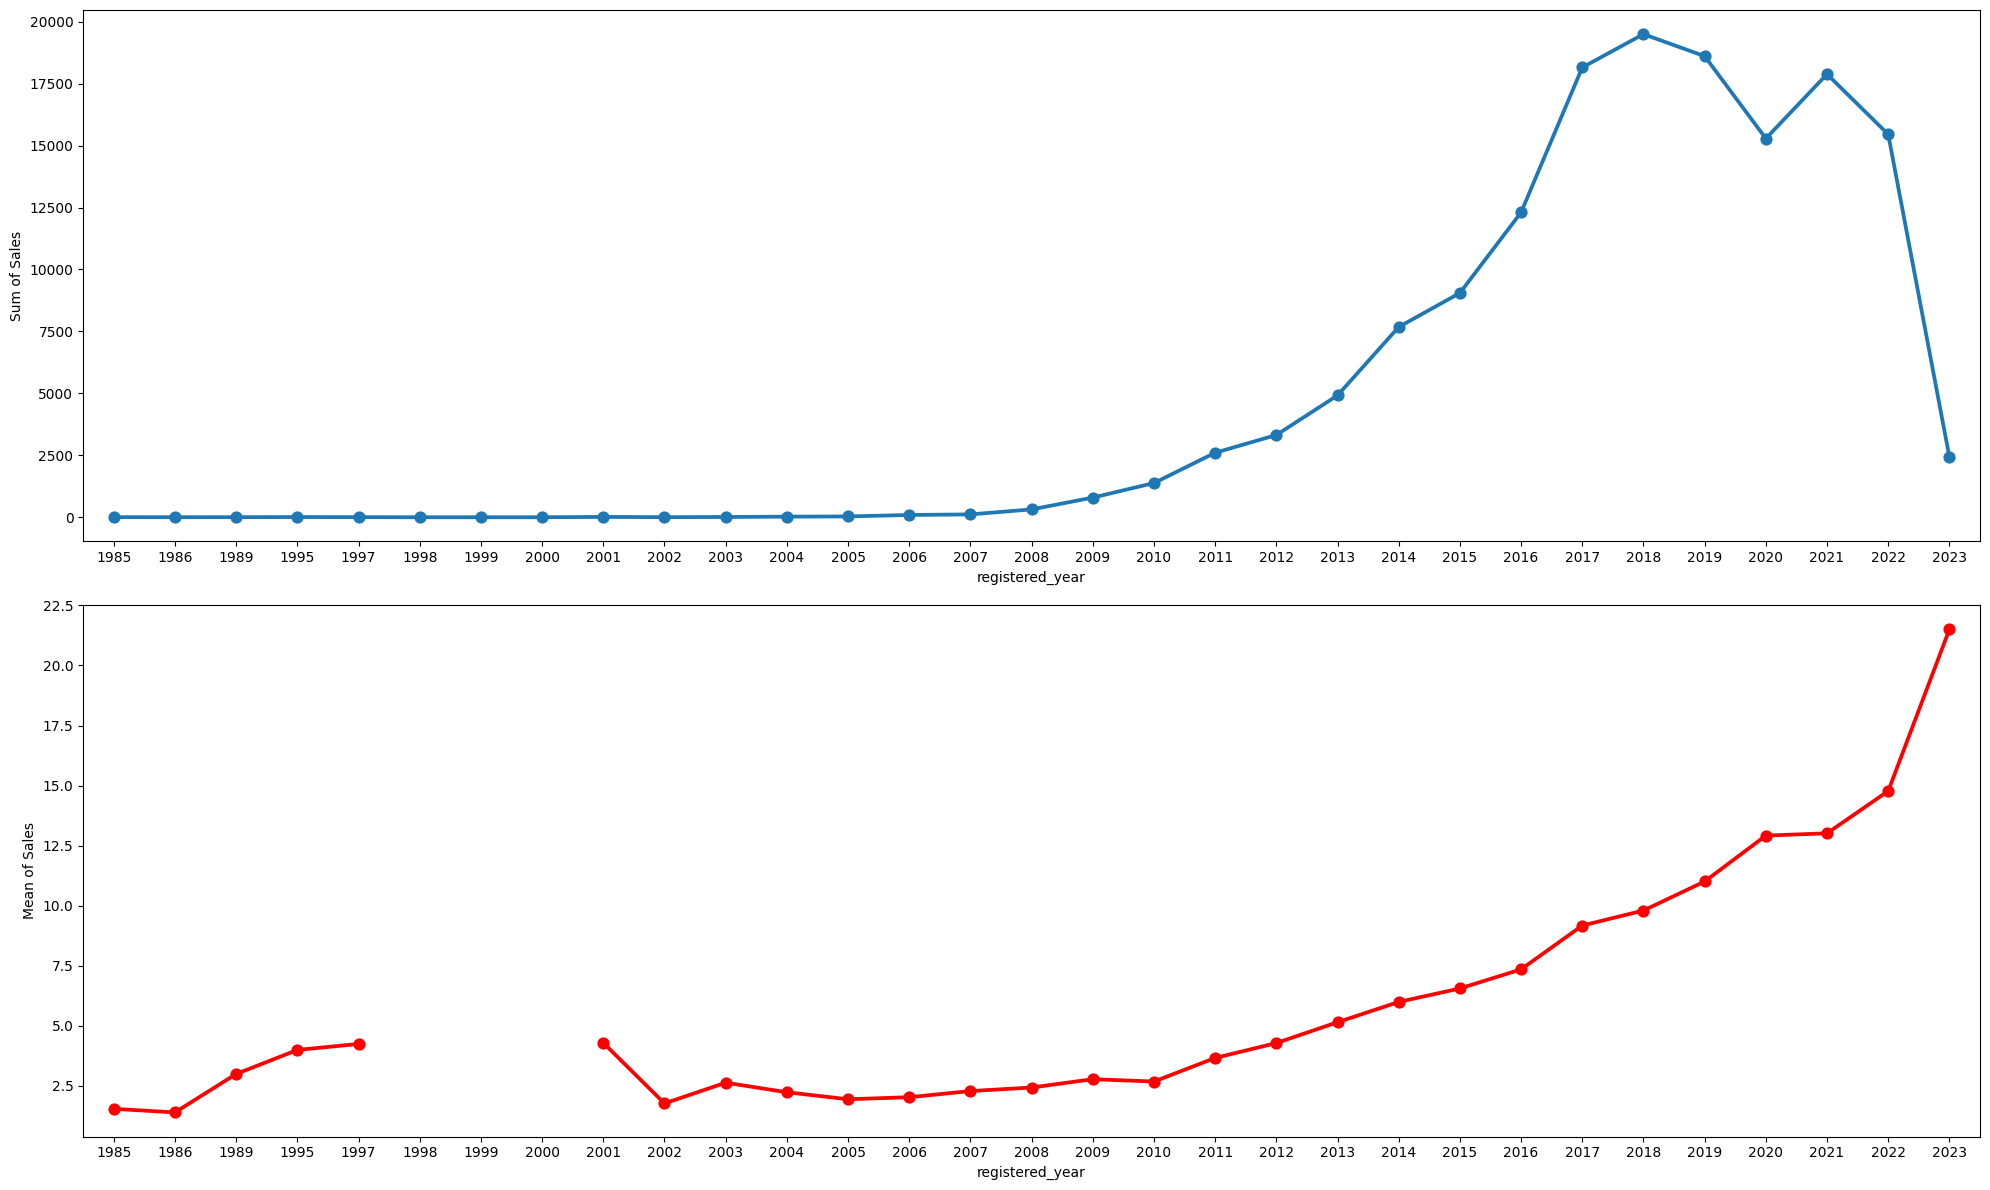

In [ ]:
year_df = Car_df.groupby("registered_year")["resale_price"].agg(["mean","sum"]).reset_index()
fig , ax = plt.subplots(2,1,figsize = (20,12))
ax1 = sns.pointplot(x=year_df["registered_year"],y=year_df["sum"],ax=ax[0])
ax1.set_ylabel("Sum of Sales")
ax2 = sns.pointplot(x=year_df["registered_year"],y=year_df["mean"],ax=ax[1],color= "r")
ax2.set_ylabel("Mean of Sales")
plt.tight_layout()

# engine_capacity_column

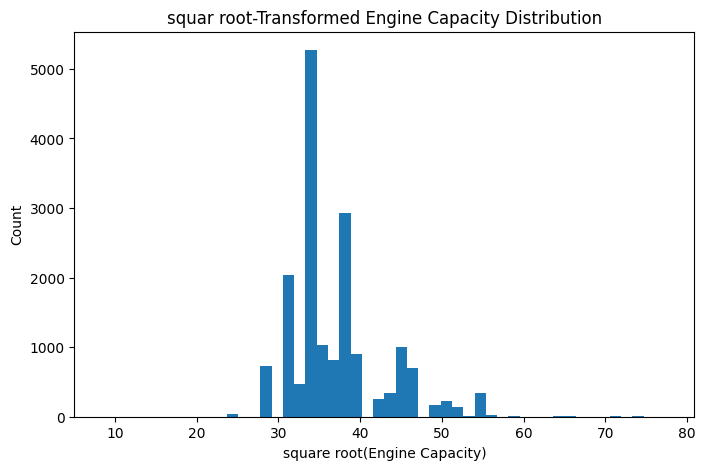

In [ ]:
plt.figure(figsize=(8, 5))

plt.hist(np.sqrt(Car_df['engine_capacity']), bins=50)

plt.title('squar root-Transformed Engine Capacity Distribution')
plt.xlabel('square root(Engine Capacity)')
plt.ylabel('Count')
plt.show()

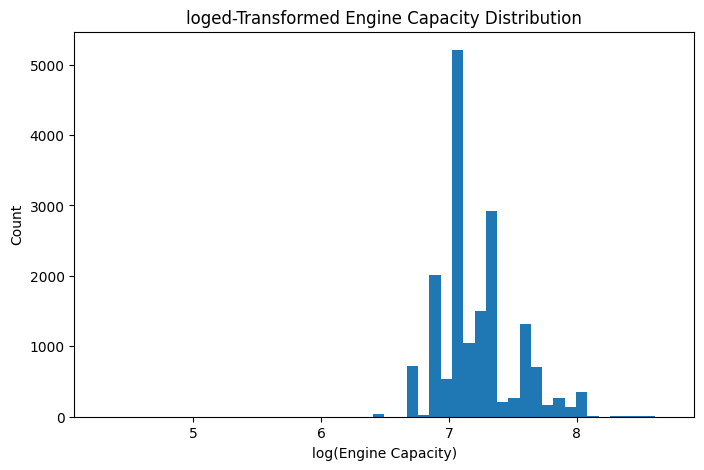

In [ ]:
plt.figure(figsize=(8, 5))

# FIX: bins=30 is now correctly placed within plt.hist()
plt.hist(np.log1p(Car_df['engine_capacity']), bins=50)

plt.title('loged-Transformed Engine Capacity Distribution')
plt.xlabel('log(Engine Capacity)')
plt.ylabel('Count')
plt.show()

after we take the log the skewness is reduced and the the graph become more normal

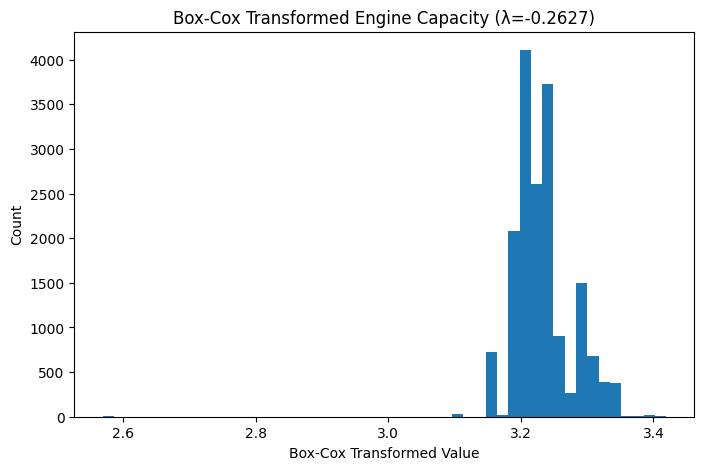

In [ ]:
from scipy import stats
boxcox_data, lambda_value = stats.boxcox(Car_df['engine_capacity'])


plt.figure(figsize=(8, 5))
plt.hist(boxcox_data, bins=50)
plt.title(f'Box-Cox Transformed Engine Capacity (λ={lambda_value:.4f})')
plt.xlabel('Box-Cox Transformed Value')
plt.ylabel('Count')
plt.show()

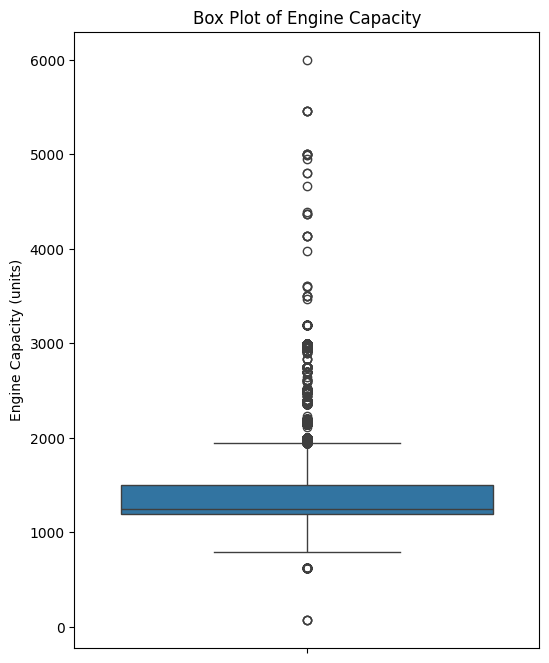

In [ ]:
plt.figure(figsize=(6, 8))

sns.boxplot(y=Car_df['engine_capacity'])

plt.title('Box Plot of Engine Capacity')
plt.ylabel('Engine Capacity (units)')
plt.show()

#km_driven

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(np.log1p(Car_df['kms_driven']), bins=50, kde=True)

plt.title('Log-Transformed Kms Driven Distribution')
plt.xlabel('log(Kms Driven)')
plt.ylabel('Count')
plt.show()


TypeError: loop of ufunc does not support argument 0 of type str which has no callable log1p method

<Figure size 800x500 with 0 Axes>

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot((Car_df[' km_group']), bins=50, kde=True)

plt.title(' Kms group Distribution')
plt.xlabel('(Km group)')
plt.ylabel('Count')
plt.show()

KeyError: ' km_group'

<Figure size 800x500 with 0 Axes>

after we take the log the skewness is reduced and the the graph become more normal

# **max power**

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot((Car_df[' max_power']), bins=50, kde=True)

plt.title(' max power Distribution')
plt.xlabel('(max power)')
plt.ylabel('Count')
plt.show()

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(np.log1p(Car_df[' max_power']), bins=50, kde=True)

plt.title('Log-Transformed max power Distribution')
plt.xlabel('log(max power)')
plt.ylabel('Count')
plt.show()

# **mileage**

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot((Car_df[' mileage']), bins=50, kde=True)

plt.title(' mileage Distribution')
plt.xlabel('(mileage)')
plt.ylabel('Count')
plt.show()

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(np.log1p(Car_df[' mileage']), bins=50, kde=True)

plt.title('log transformation mileage Distribution')
plt.xlabel('log(mileage)')
plt.ylabel('Count')
plt.show()

# **fuel_type**

In [ ]:
car_df['fuel_type'].value_counts().plot(kind='bar')
plt.xlabel('fuel_type')
plt.ylabel('Count')
plt.title('Distribution of fuel_type')
plt.show()

# **owner_type**

In [ ]:
car_df['owner_type'].value_counts().plot(kind='bar')
plt.xlabel('owner_type')
plt.ylabel('Count')
plt.title('Distribution of owner_type')
plt.show()

# **transmission_type**

In [ ]:
car_df['transmission_type'].value_counts().plot(kind='bar')
plt.xlabel('transmission_type')
plt.ylabel('Count')
plt.title('Distribution of transmission_type')
plt.show()

# **owner_type**

In [ ]:
car_df['owner_type'].value_counts().plot(kind='bar')
plt.xlabel('owner_type')
plt.ylabel('Count')
plt.title('Distribution of owner_type')
plt.show()

# **body_type**

In [ ]:
car_df['body_type'].value_counts().plot(kind='bar')
plt.xlabel('body_type')
plt.ylabel('Count')
plt.title('Distribution of body_type')
plt.show()

# Regression

In [55]:
Car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17446 entries, 0 to 17445
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   full_name                   17446 non-null  object  
 1   resale_price                17446 non-null  float64 
 2   registered_year             17446 non-null  int64   
 3   engine_capacity             17446 non-null  int64   
 4   insurance                   17446 non-null  object  
 5   transmission_type           17446 non-null  object  
 6   kms_driven                  17446 non-null  int64   
 7   owner_type                  17401 non-null  object  
 8   fuel_type                   17446 non-null  object  
 9   max_power                   17344 non-null  object  
 10  seats                       17436 non-null  float64 
 11  mileage                     16938 non-null  float64 
 12  body_type                   17446 non-null  object  
 13  city            

In [56]:
Car_df["mileage"].describe()

,mileage
count,16938.000000
mean,19.398051
std,4.466195
min,6.700000
25%,17.000000
50%,18.900000
75%,21.630000
max,140.000000


In [245]:
Car_df['mileage'] = Car_df['mileage'].str.replace("[^0-9.]", "", regex = True).astype(float)

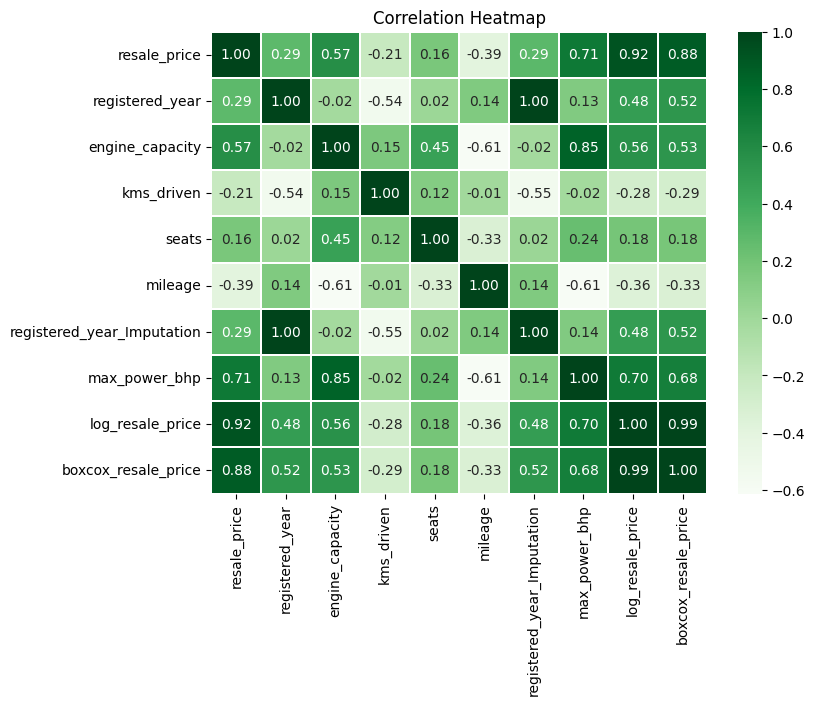

In [275]:
numeric_cols = Car_df.select_dtypes(include=['float64','int64','int32'])
plt.figure(figsize=(8,6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='Greens', fmt=".2f", linewidths=0.2)
plt.title("Correlation Heatmap")
plt.show()

## Outliers

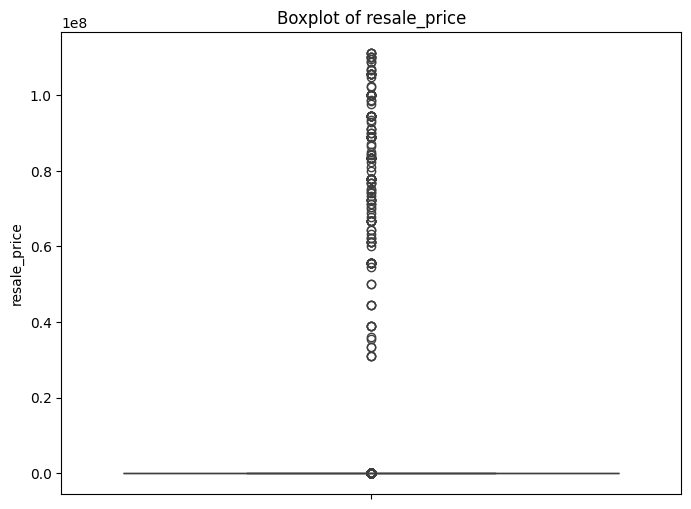

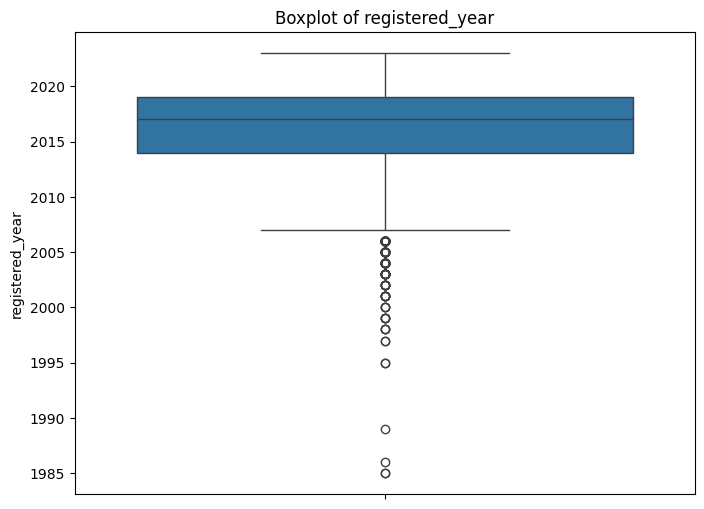

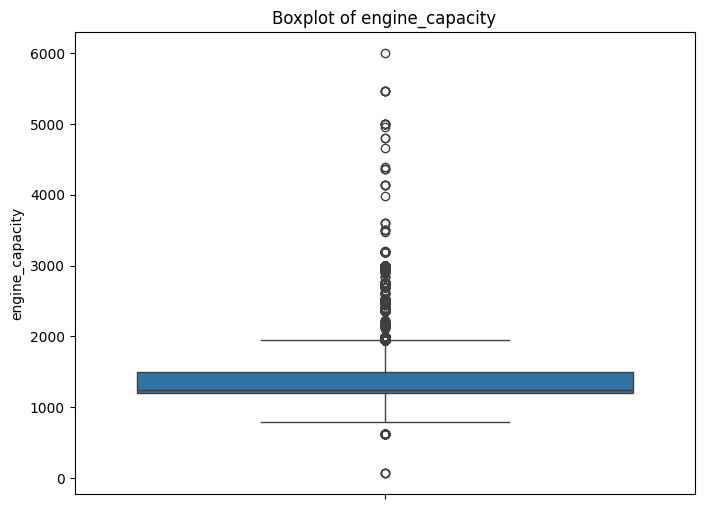

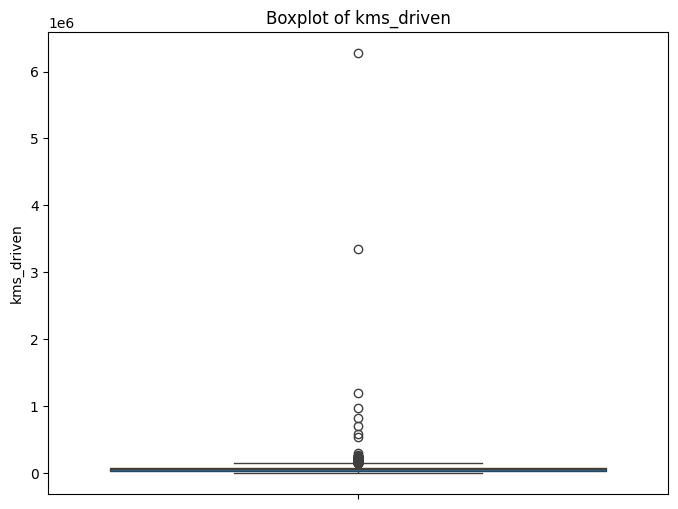

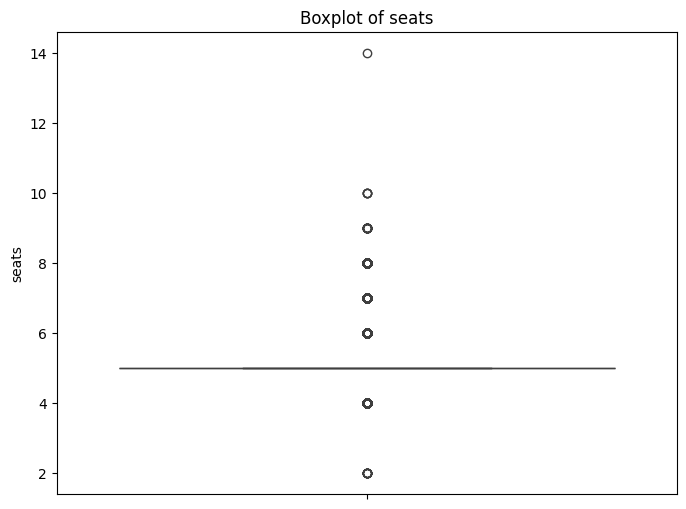

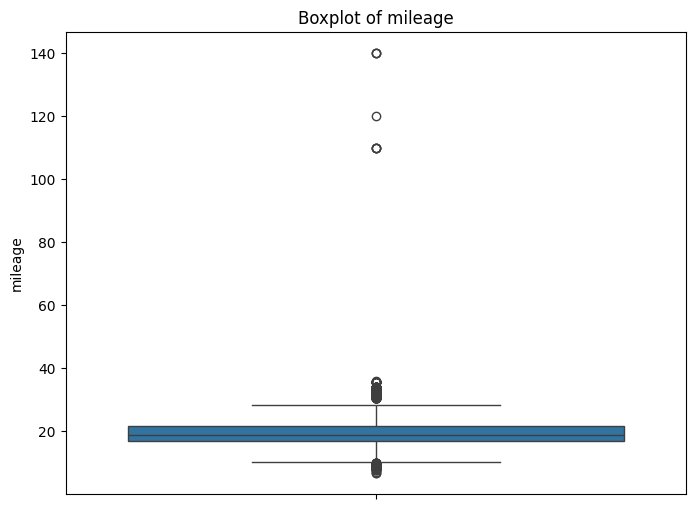

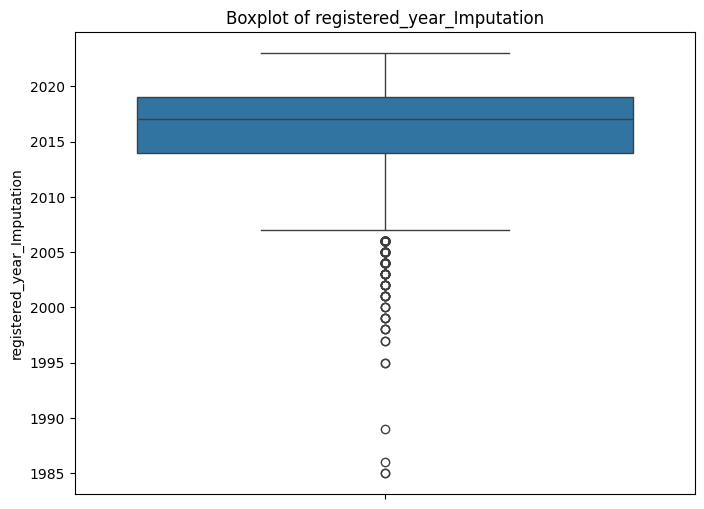

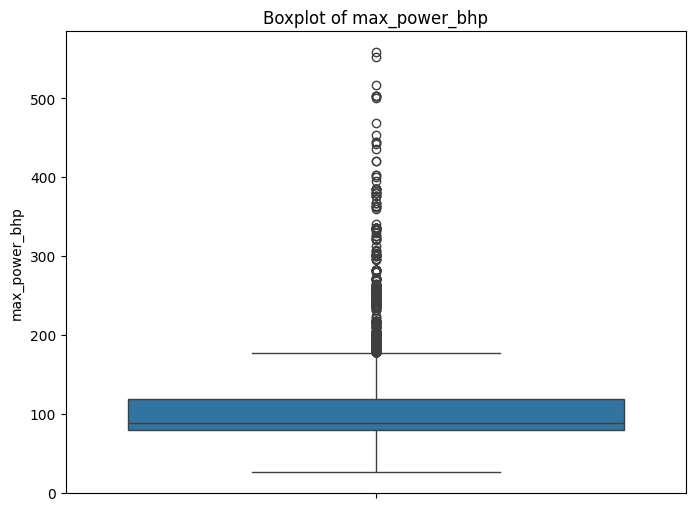

In [60]:
for num in numeric_cols:
    plt.figure(figsize=(8,6))
    sns.boxplot(Car_df[num])
    plt.title(f"Boxplot of {num}")
    plt.show()

In [261]:
outlie = Car_df.select_dtypes(include= ["float64", "int64", "int32"]).drop(columns = ["registered_year", "seats", "registered_year_Imputation"])

zscore_lower = -1.96
zscore_upper = 1.96

zscores = stats.zscore(outlie)
z_score_outliers = outlie[(zscores < zscore_lower) | (zscores > zscore_upper)]

We handle outliers using winsorization

In [262]:
for col in outlie.columns:
    lower_bound = Car_df[col].quantile(0.05)
    upper_bound = Car_df[col].quantile(0.95)
    Car_df[col] = np.where(Car_df[col] < lower_bound, lower_bound, Car_df[col])
    Car_df[col] = np.where(Car_df[col] > upper_bound, upper_bound, Car_df[col])

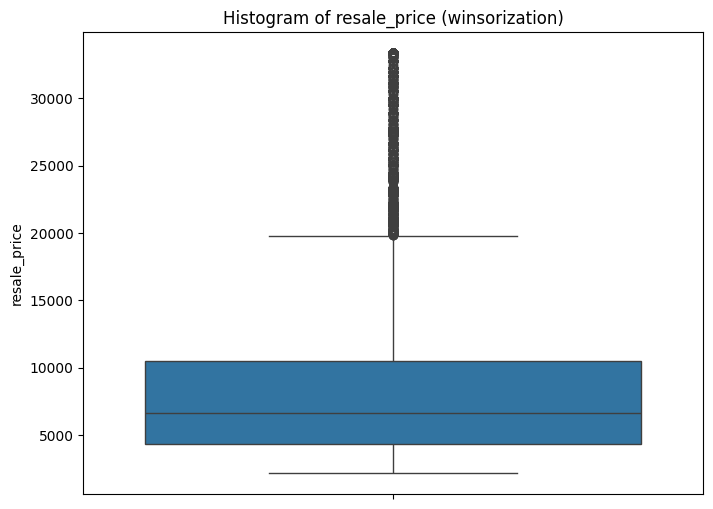

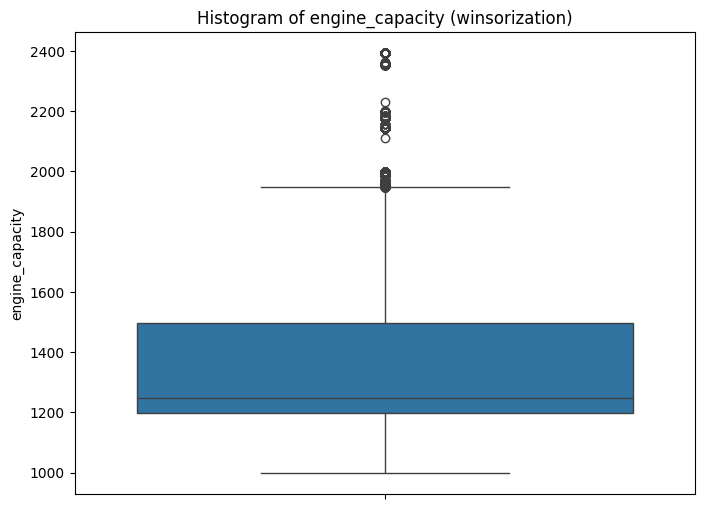

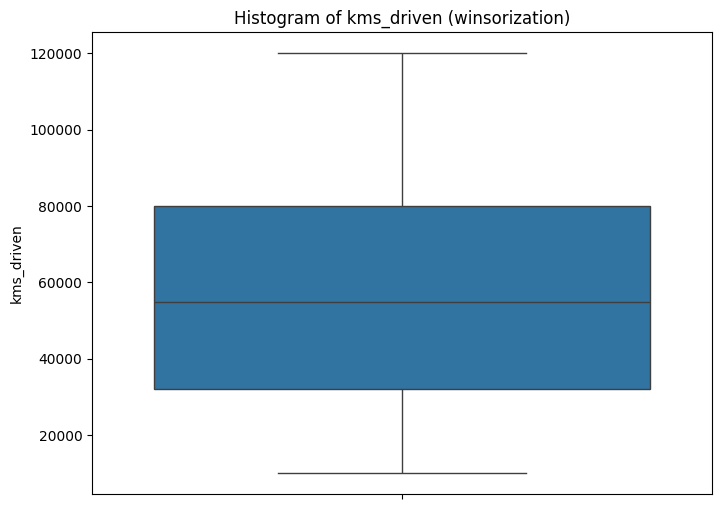

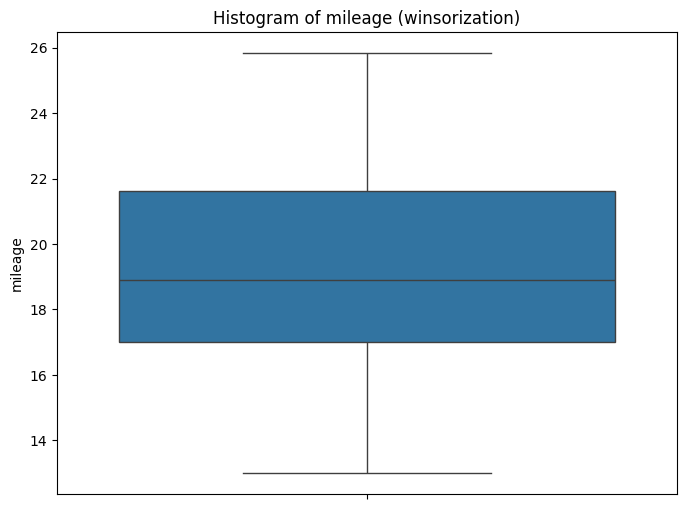

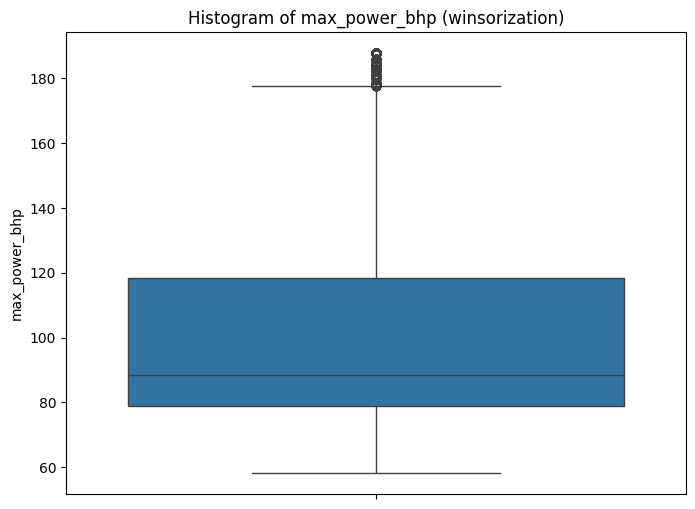

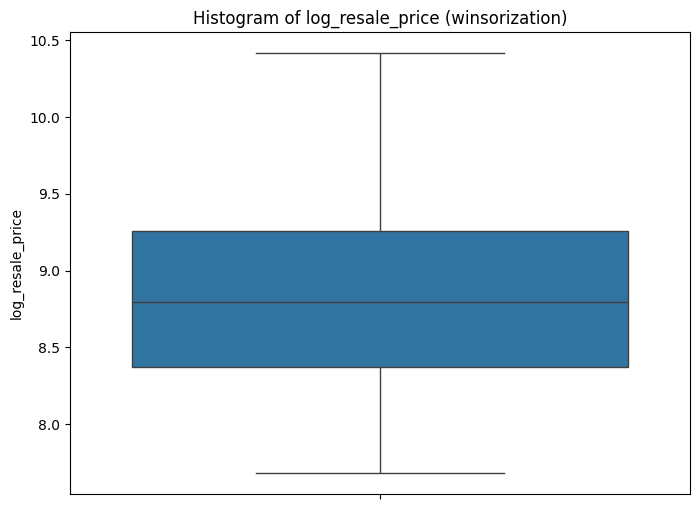

In [263]:
import matplotlib.pyplot as plt
import seaborn as sns
for num in outlie.columns:
    plt.figure(figsize=(8,6))
    sns.boxplot(Car_df[num])
    plt.title(f"Histogram of {num} (winsorization)")
    plt.show()

In [277]:
boxcox_resale_price, fitted_lambda = boxcox(Car_df["resale_price"])

print(f"Best lambda for the job: {fitted_lambda}")

Car_df['boxcox_resale_price'] = boxcox_resale_price

Best lambda for the job: -0.2608030063754786


Text(0.5, 1.0, 'Boxcox Transformed Resale Price')

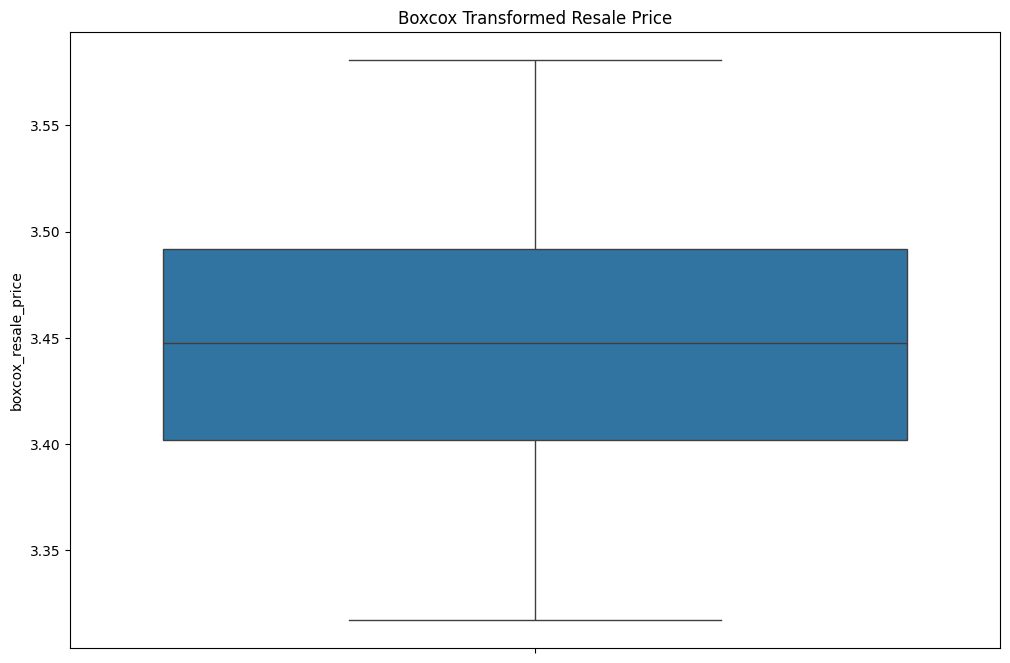

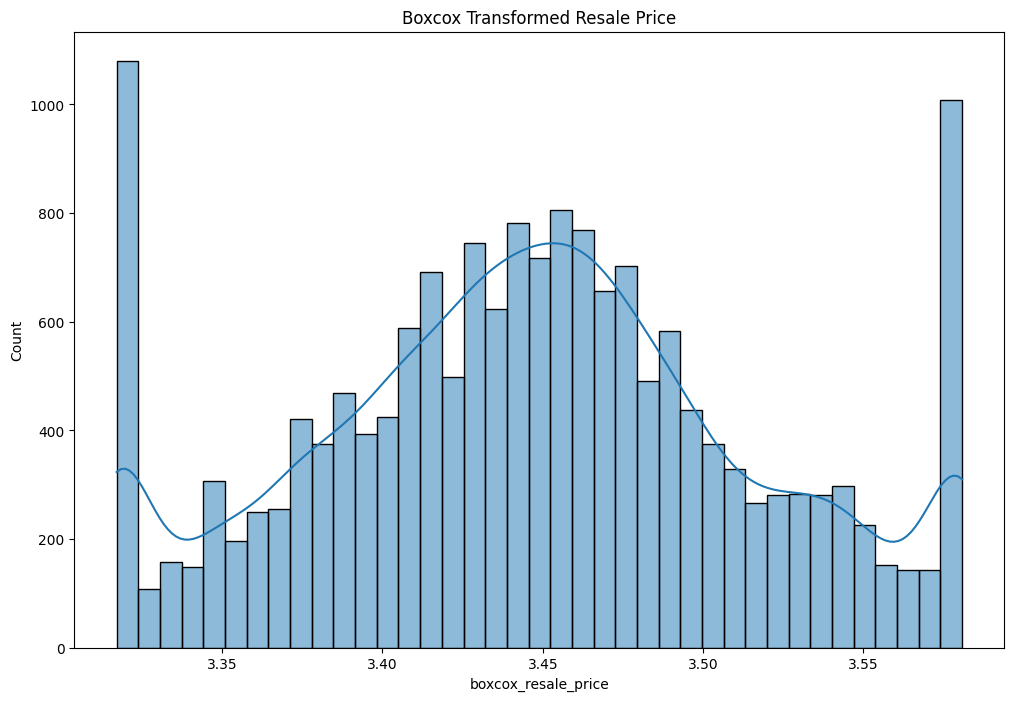

In [273]:
plt.figure(figsize= (12,8))
sns.boxplot(Car_df['boxcox_resale_price'])
plt.title('Boxcox Transformed Resale Price')

plt.figure(figsize= (12,8))
sns.histplot(Car_df['boxcox_resale_price'],
             kde = True)
plt.title('Boxcox Transformed Resale Price')

In [274]:
print(f"Skewness after transformation: {Car_df["boxcox_resale_price"].skew()}")
print(f"Kurtosis after transformation: {Car_df["boxcox_resale_price"].kurtosis()}")

Skewness after transformation: 0.03525954957772
Kurtosis after transformation: -0.5456058834041042


In [176]:
Car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17446 entries, 0 to 17445
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   full_name                   17446 non-null  object  
 1   resale_price                17446 non-null  float64 
 2   registered_year             17446 non-null  int64   
 3   engine_capacity             17446 non-null  float64 
 4   insurance                   17446 non-null  object  
 5   transmission_type           17446 non-null  object  
 6   kms_driven                  17446 non-null  float64 
 7   owner_type                  17401 non-null  object  
 8   fuel_type                   17446 non-null  object  
 9   max_power                   17344 non-null  object  
 10  seats                       17436 non-null  float64 
 11  mileage                     16938 non-null  float64 
 12  body_type                   17446 non-null  object  
 13  city            

In [ ]:
imputer = KNNImputer(n_neighbors = 5, weights = "distance")